# The Billboard Hot 100

Started by Billboard Magazine the Billboard Hot 100 is the industry standard record chart in the United States. It is published on a weekly basis (the cut-off date being Saturday). 

Chart rankings are based on sales (physical and digital), radio play, and online streaming in the United States.

The weekly tracking period for sales was initially Monday to Sunday when Nielsen started tracking sales in 1991, but was changed to Friday to Thursday in July 2015. This tracking period also applies to compiling online streaming data. Radio airplay, which, unlike sales figures and streaming, is readily available on a real-time basis, is tracked on a Monday to Sunday cycle (previously Wednesday to Tuesday). A new chart is compiled and officially released to the public by Billboard on Tuesdays.

The Billboard Hot 100 goes way back to 1958 and has had hundreds of songs listed and yet, I'm fascinated that only a small amount of all music makes its way onto this chart. In this notebook I'll explore the songs that make it onto the Hot 100 and in the process answer a few questions, I've always had about this famous weekly list.

In [1]:
import numpy as np
import pandas as pd

hot100 = pd.read_csv('../data/processed/hot100.csv',parse_dates=['date','entry_date','exit_date','peak_date','max_leap_date'],sep='\t')
hot100_uniq = hot100.drop_duplicates(subset=['artist','title']).drop('rank',axis=1)
hot100_uniq.set_index(['artist','title'],drop=True,inplace=True)
hits = pd.read_csv('../data/processed/hits_uniq.csv',sep='\t')
nhits = pd.read_csv('../data/processed/nhits_uniq.csv',sep='\t')

hot100.head(5)

,rank,date,year,month,day,title,artist,week,reentry,streak,...,peak_day,leap_week,leap,max_leap,max_leap_date,max_leap_week,max_leap_year,max_leap_month,max_leap_day,low
0,1,1967-07-08,1967,7,8,Windy,The Association,7,0,13,...,27,7,0.0,24.0,1967-06-03,2.0,1967.0,6.0,3.0,52
1,2,1967-07-08,1967,7,8,Little Bit O' Soul,The Music Explosion,9,0,15,...,13,9,1.0,33.0,1967-05-27,3.0,1967.0,5.0,27.0,90
2,3,1967-07-08,1967,7,8,Can't Take My Eyes Off You,Frankie Valli,8,0,15,...,20,8,4.0,21.0,1967-05-27,2.0,1967.0,5.0,27.0,74
3,4,1967-07-08,1967,7,8,San Francisco (Be Sure To Wear Flowers In Your...,Scott McKenzie,7,0,11,...,27,7,0.0,43.0,1967-06-03,2.0,1967.0,6.0,3.0,98
4,5,1967-07-08,1967,7,8,Don't Sleep In The Subway,Petula Clark,6,0,9,...,3,6,5.0,27.0,1967-06-10,2.0,1967.0,6.0,10.0,76


In [2]:
# Define Main Columns
main_cols_hot100 = ['rank','date','week','title','artist','reentry','streak','ranked','entry','exit','peak','low','max_leap','leap']
main_cols_hot100_uniq = ['entry_year','reentry','streak','ranked','entry','exit','peak','low','max_leap']

In [3]:
hot100.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,316685.0,50.501094,28.866120,1.0,26.0,51.0,76.0,100.0
year,316685.0,1988.441669,17.526335,1958.0,1973.0,1988.0,2004.0,2019.0
month,316685.0,6.526754,3.454862,1.0,4.0,7.0,10.0,12.0
day,316685.0,15.717426,8.798738,1.0,8.0,16.0,23.0,31.0
week,316685.0,9.045604,7.423191,1.0,4.0,7.0,13.0,87.0
reentry,316685.0,0.125276,0.486193,0.0,0.0,0.0,0.0,14.0
streak,316685.0,15.683979,9.305860,0.0,9.0,15.0,19.0,84.0
ranked,316685.0,17.091207,9.619444,1.0,10.0,16.0,20.0,87.0
entry_week,316685.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
entry,316685.0,78.154832,19.982164,1.0,71.0,84.0,92.0,100.0


# Data

The **Hot 100 charts, hits sample, audio-features and non-hits sample** have been obtained from **Billboard.com (Hot 100)** and the **Spotify API (Audio Features and Non Hits Sample)**

The **hits** sample is a subset of the **Hot 100** charts, enriched using the [Spotify Audio Features Endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). Unfortunately, not all songs could be matched with a Spotify ID and retrieved. Hence, **hits** has dropped all songs that came back empty.

The **non-hits** sample is sampled using the [Spotify API Search](https://developer.spotify.com/documentation/web-api/reference/search/search/), randomly sampling a songs by year, so as to find songs that did not become hits. As that method overemphasizes popular songs, I've sampled 20% of each year from the lowest popularity (i.e. Spotify's popularity score).

For more information check out the Wrangling notebook *Wrangling (Hot 100 and Spotify Sample)*.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

GrayO = ['orange',"gray","black"]
sns.set_palette(GrayO)
colorsO = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704','#7f1300'][::-1]

%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.options.display.max_columns = 400
pd.options.display.max_rows = 1000

# The History

We'll start by looking into the general distribution of songs in the Hot 100 to better understand the structure within hits.

- How many songs made it onto the Hot 100 since 1958?
- How long did songs stay on the Hot 100?
- What positions have the most fluctuation?

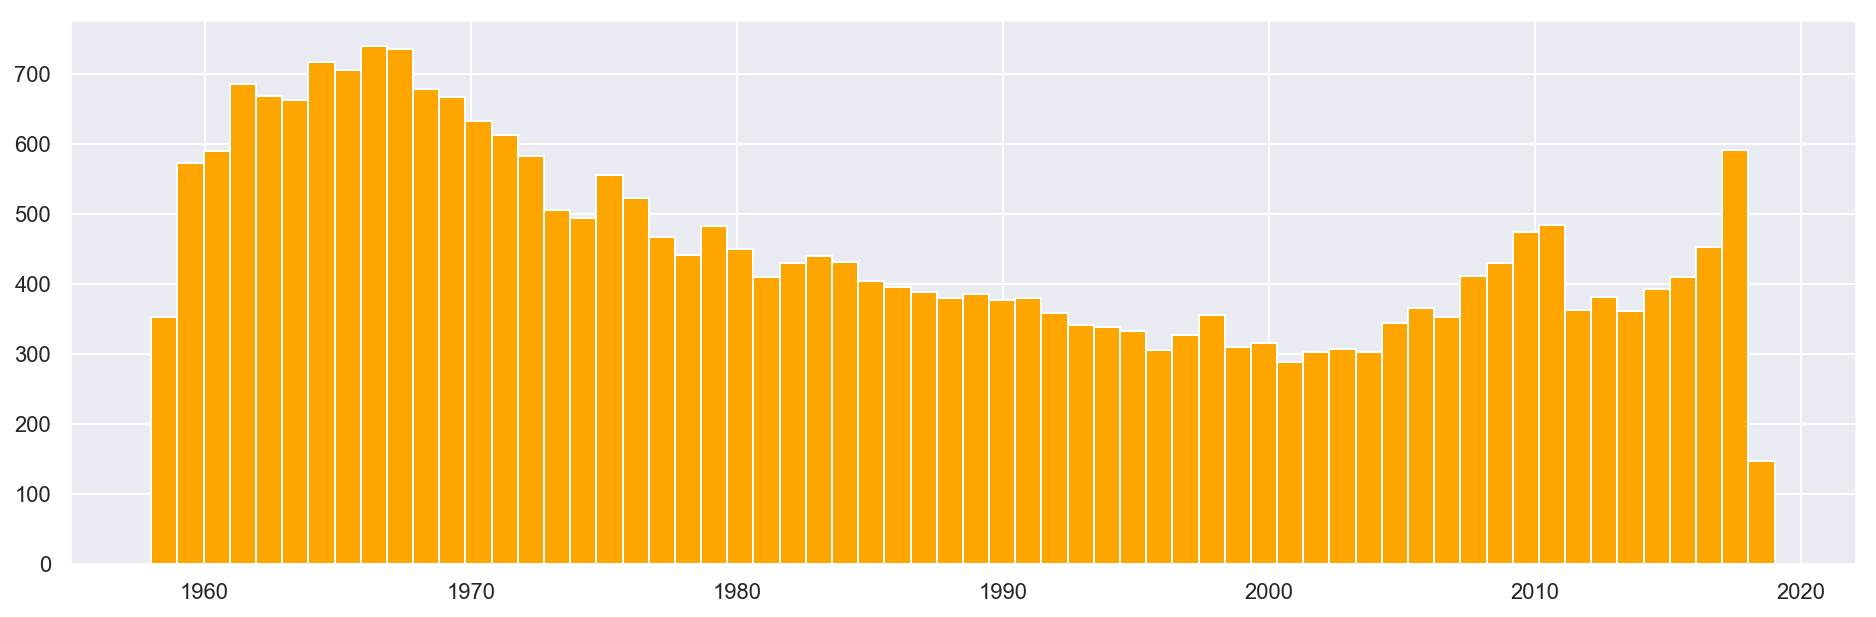

In [5]:
_ = plt.figure(figsize=(16,5))

years = len(hot100_uniq['entry_year'].unique())
_ = plt.hist(hot100_uniq['entry_year'],bins=years)

In [6]:
# Number of Unique Songs on the Hot 100 since 1958
print("Since 1958 there were *{}* songs on the Billboard Hot 100.".format(len(hot100_uniq)))

Since 1958 there were *28083* songs on the Billboard Hot 100.


In [7]:
# Number 1 Songs
hot100_first_dt = hot100_uniq.loc[hot100_uniq.date == hot100_uniq.date.min(),'date'][0]
hot100_first_dt = str(hot100_first_dt.year) + '-' + str(hot100_first_dt.month) + '-' + str(hot100_first_dt.day)
hot100_last_dt = hot100_uniq.loc[hot100_uniq.date == hot100_uniq.date.max(),'date'][0]
hot100_last_dt = str(hot100_last_dt.year) + '-' + str(hot100_last_dt.month) + '-' + str(hot100_last_dt.day)
total_weeks = len(hot100.date.unique())
print("Total of Number 1 Hit Songs between {} and {} ({} weeks): *{}*".format(hot100_first_dt,hot100_last_dt,total_weeks,len(hot100_uniq.loc[hot100_uniq['peak'] == 1,:])))

Total of Number 1 Hit Songs between 1958-8-4 and 2019-4-13 (3167 weeks): *1086*


### Who Stayed the longest? Looking at Streaks

Long streaks on the Hot 100 have long been seen as a statement of accomplishment. In this section we'll have a look at the distribution of streaks by year, peak and entry position.

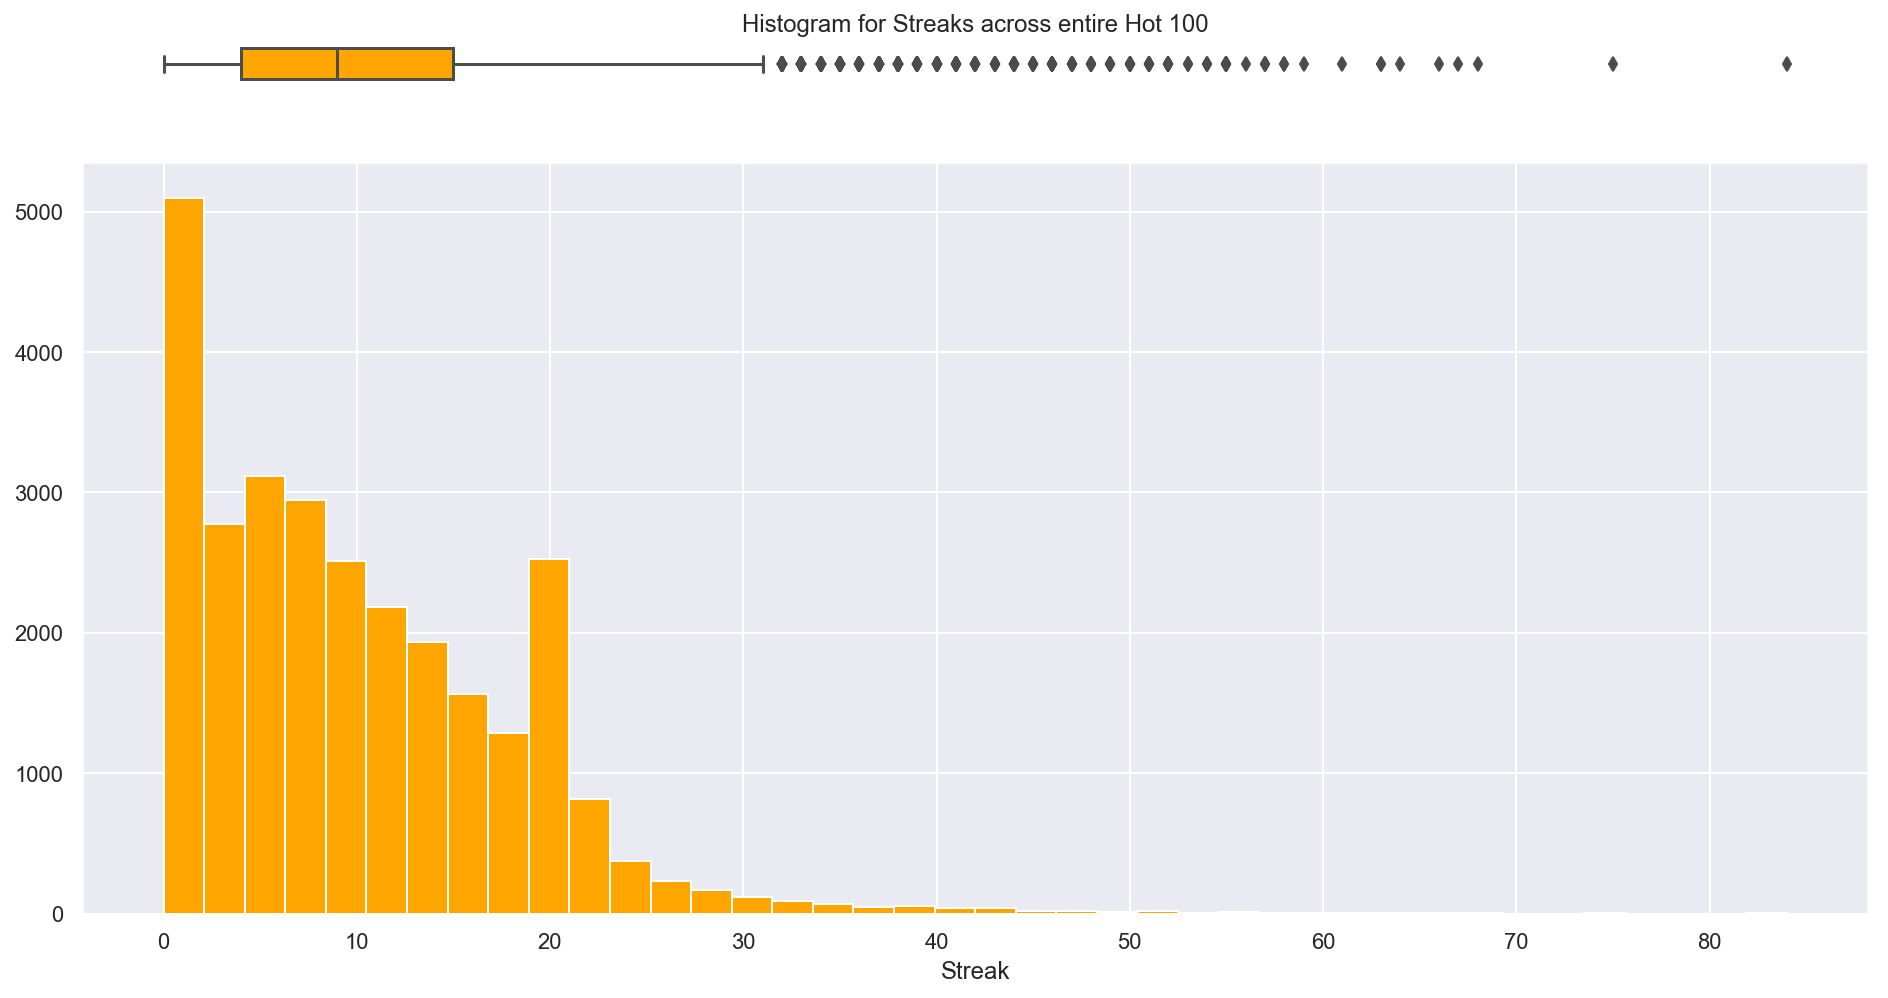

Outliers in Streaks across the entire data set (according to 1.5 IQR rule): >31


In [8]:
def get_outlier_boundary(series):
    first_q = series.quantile(q=0.25)
    third_q = series.quantile(q=0.75)
    iqr = (third_q - first_q)
    return int(third_q + iqr * 1.5)

def create_hist(x,std=False,xticks=False,bins=50):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.05, .95)}, figsize=(16,8))

    _ = sns.boxplot(x, ax=ax_box,saturation=1)
    _ = ax_box.grid(False)
    _ = ax_box.set_facecolor('white')
    _ = ax_box.set(yticks=[])
    _ = ax_box.set_xlabel(None)

    _ = ax_hist.hist(x,bins=bins)
    if xticks:
        _ = ax_hist.set_xticks(np.arange(xticks[0],xticks[1]+xticks[2],xticks[2]))
    if std:
        plus_two_std = x.mean() + x.std()*1.96
        minus_two_std = x.mean() - x.std()*1.96
        _ = ax_hist.plot([plus_two_std,plus_two_std],[0,500],c='black')
        _ = ax_hist.annotate(s='μ + 2σ',xy=[plus_two_std,500],xytext=[plus_two_std - 3,550])
        _ = ax_hist.plot([minus_two_std,minus_two_std],[0,500],c='black')
        _ = ax_hist.annotate(s='μ - 2σ',xy=[minus_two_std,500],xytext=[minus_two_std - 3,550])
    return ax_box,ax_hist

ax_box, ax_hist = create_hist(hot100_uniq['streak'],xticks=(0,80,10),bins=40)
_ = ax_box.set_title('Histogram for Streaks across entire Hot 100')
_ = ax_hist.set_xlabel('Streak')

plt.show()

upper_whisker = get_outlier_boundary(hot100_uniq['streak'])
print('Outliers in Streaks across the entire data set (according to 1.5 IQR rule): >{}'.format(upper_whisker))

The boxplot across the entire dataset gives us some information on median, quantiles and outliers that will inform our analysis in more detail below. 

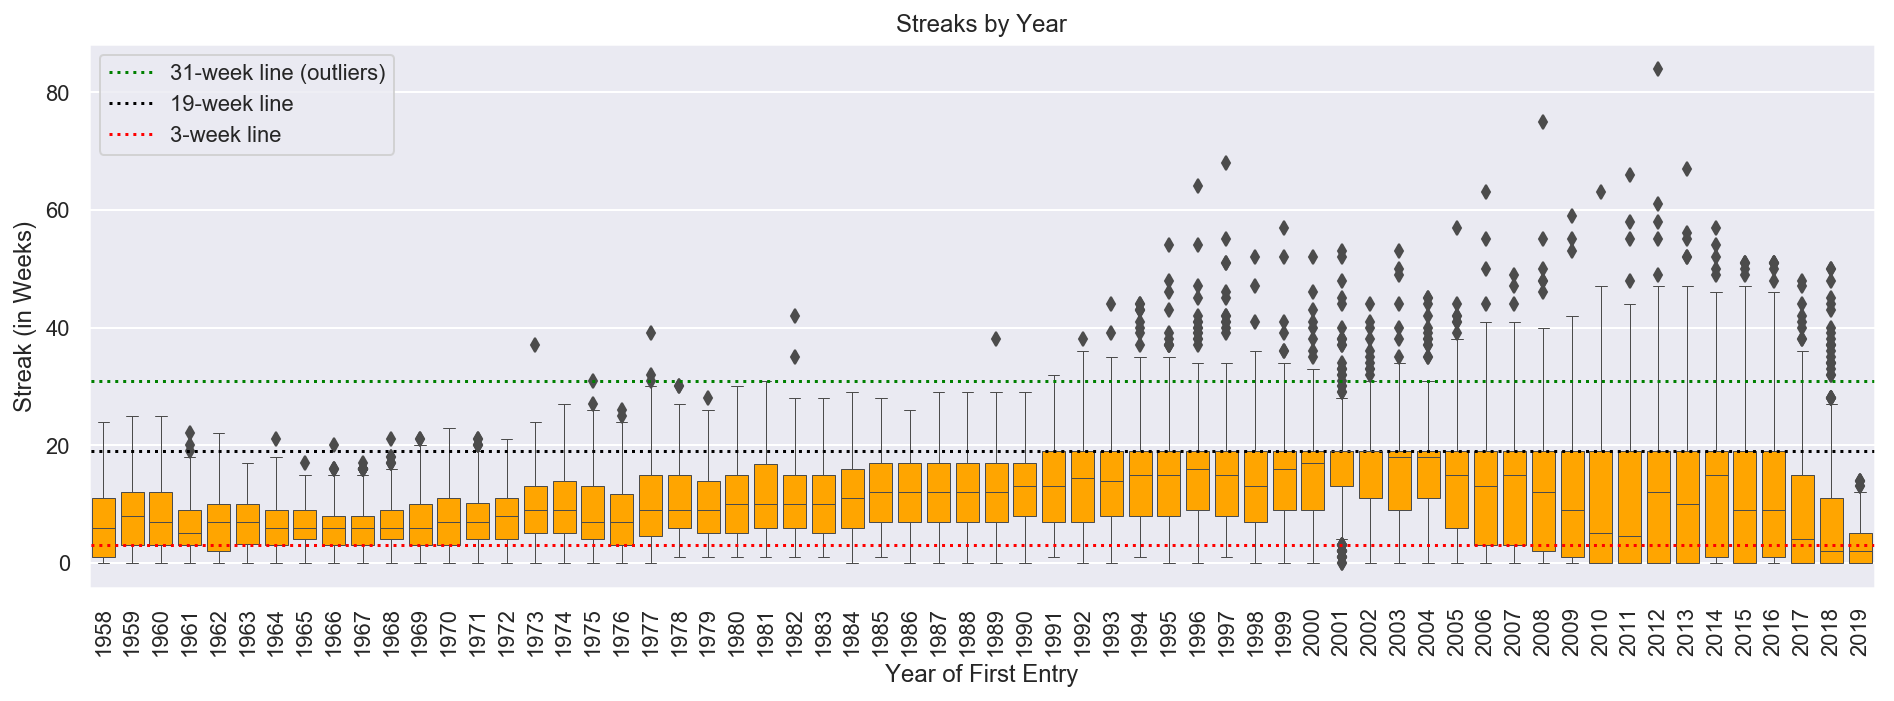

In [9]:
_ = plt.figure(figsize=(16,5))

_ = sns.boxplot(x='entry_year',y='streak',data=hot100_uniq,color='orange',saturation=1,linewidth=0.5)
_ = plt.plot([-1,62],[upper_whisker,upper_whisker],c='green',linestyle='dotted',label='31-week line (outliers)')
_ = plt.plot([-1,62],[19,19],c='black',linestyle='dotted',label='19-week line')
_ = plt.plot([-1,62],[3,3],c='red',linestyle='dotted',label='3-week line')
_ = plt.xticks(rotation=90)
_ = plt.title('Streaks by Year')
_ = plt.xlabel('Year of First Entry')
_ = plt.ylabel('Streak (in Weeks)')
_ = plt.legend()

plt.show()


In [10]:
outlier_bf_1991 = hot100_uniq.loc[(hot100_uniq['year'] < 1991) & (hot100_uniq['streak'] > upper_whisker),['streak','peak','entry','exit']]
outlier_af_1991 = hot100_uniq.loc[(hot100_uniq['year'] >= 1991) & (hot100_uniq['streak'] > upper_whisker),['streak','peak','entry','exit']]

print("Number of Titles that stayed on the Hot 100 for more than 30 weeks \nBefore 1991 (33 years) - {}\nAfter 1991 (29 years) - {}".format(len(outlier_bf_1991),len(outlier_af_1991)))

Number of Titles that stayed on the Hot 100 for more than 30 weeks 
Before 1991 (33 years) - 6
After 1991 (29 years) - 430


In the above chart we can see the streak length by year. Until the early 1970s no song title would be on the Hot 100 for more than 25 weeks and until the early 1990s staying charted for over 31 weeks (i.e. outliers across the entire data as shown above) was the rare exception. In fact, there are only 6 artists who've achieved this feat (they are listed below).

In [11]:
outlier_bf_1991.sort_values(by='streak',ascending=False).head(10)

,,streak,peak,entry,exit
artist,title,,,,
Soft Cell,Tainted Love,42,8,90,97
Paul Davis,I Go Crazy,39,7,89,99
Young M.C.,Bust A Move,38,7,81,90
Kris Kristofferson,Why Me,37,16,100,52
Laura Branigan,Gloria,35,2,84,98
Bee Gees,How Deep Is Your Love,32,1,83,59


Go to Playlist: https://open.spotify.com/user/1162788143/playlist/0iP1Sz5qSCmVomZUNYbKPj?si=8SyDMByGRK60HNPHv9-HZA

In [12]:
longest_streaks = outlier_af_1991.sort_values(by='streak',ascending=False).head(10)
longest_streaks

,,streak,peak,entry,exit
artist,title,,,,
Imagine Dragons,Radioactive,84,3,93,49
Jason Mraz,I'm Yours,75,6,93,48
LeAnn Rimes,How Do I Live,68,2,89,45
OneRepublic,Counting Stars,67,2,32,50
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,66,1,78,49
Jewel,Foolish Games/You Were Meant For Me,64,2,61,47
Adele,Rolling In The Deep,63,1,68,49
Carrie Underwood,Before He Cheats,63,8,92,47
The Lumineers,Ho Hey,61,3,90,50


Go to Playlist: https://open.spotify.com/user/1162788143/playlist/4hzjzSssha8VLHqwbyJiWA?si=xWT5wbXAR7OOeuyCrQKO-w

_NOTE: Unfortunately, there is 52 of the 430 songs missing from the playlist that couldn't be found on Spotify or are missing due to country restrictions._

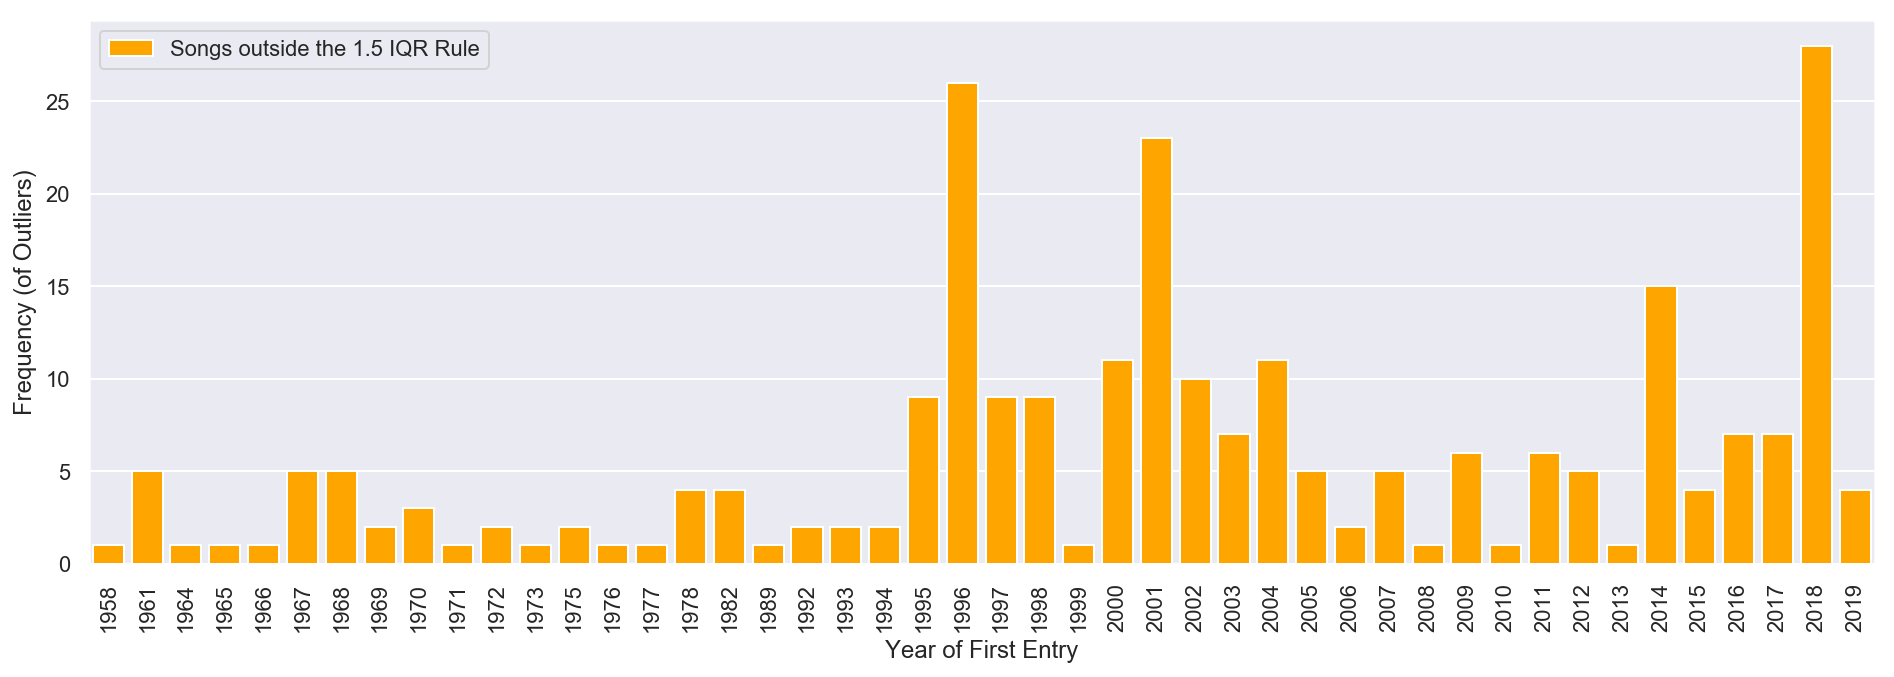

Standard Deviations:
<1991: 5.703656742368894
>=1991: 10.154355499124337


In [13]:
_ = plt.figure(figsize=(16,5))

# Define outlier_boundary by year and retrieve outliers
outlier_boundary = hot100_uniq.groupby(by='year').streak.apply(get_outlier_boundary)
outlier_boundary.name = 'outlier_boundary'
hot100_streak = hot100_uniq.merge(outlier_boundary,on=['year'],how='left')
outliers = hot100_streak.loc[hot100_streak['streak'] > hot100_streak['outlier_boundary'], :]

# Plot data
sns.countplot(outliers.year,color='orange',saturation=1)
plt.xlabel('Year of First Entry')
plt.xticks(rotation=90)
plt.ylabel('Frequency (of Outliers)')
plt.legend(['Songs outside the 1.5 IQR Rule'])
plt.show()

# Print Standard Deviation along the 1991 boundary
std_bf_1991 = hot100_uniq.loc[hot100_uniq['year'] < 1991,'streak'].std()
std_af_1991 = hot100_uniq.loc[hot100_uniq['year'] >= 1991,'streak'].std()
print("Standard Deviations:\n<1991: {}\n>=1991: {}".format(std_bf_1991,std_af_1991))

### Super Songs emerge in 1995

With 1995 we can also see a pattern of 'Super Songs' emerge. Before 1995, there were only few songs that stayed long enough to be considered an outlier (IQR * 1.5 rule). After 1993, however we can suddenly see these breakout songs occuring much more often. Standout years are 1996, 2001 and 2018 but other years are generating outliers more densely as well. This is despite (or due to?) a generally larger standard deviation in streaks on the Hot 100 after 1991. We can also see in the first streak plot that the outliers tend to stray further than outliers before 1991 (i.e. they stay longer on the hot 100 or are 'stickier').

### 19-week Pattern of lower 75% (third quartile)

Between 1991 and 2016 the third quartile (i.e. upper quartile) is consistently at 19 weeks. There's no deviation from this pattern, no single year has a third quartile that surpasses the 19 weeks cap, which makes me wonder whether there is an unknown underlying rule and whether that is an rule explicitly set by Billboard or has some mathematical logic to it that sets this limitation to 19 weeks for the lower 75% due to the restriction to 100 spots and 52 weeks in total.

### Higher Fluctuation in Recent Years

Starting in 2006 we can see that the first quartile (i.e. lower quartile) is stretching into the <3 weeks region. A pattern we hadn't seen since the mid-1970s. This would indicate a higher fluctuation and is probably a result of Billboard starting slowly incorporating more and more online sales and streaming revenue into their formula since 2005 (https://en.m.wikipedia.org/wiki/Billboard_Hot_100 see _Digital downloads and online streaming_). 

In [14]:
hot100.sort_values(by=['entry','title','artist','date']).head()

,rank,date,year,month,day,title,artist,week,reentry,streak,ranked,entry_date,entry_week,entry,entry_year,entry_month,entry_day,exit_date,exit_week,exit,exit_year,exit_month,exit_day,peak,peak_date,peak_week,peak_year,peak_month,peak_day,leap_week,leap,max_leap,max_leap_date,max_leap_week,max_leap_year,max_leap_month,max_leap_day,low
246490,1,2009-10-24,2009,10,24,3,Britney Spears,1,0,19,20,2009-10-24,1,1,2009,10,24,2010-03-06,20,72,2010,3,6,1,2009-10-24,1,2009,10,24,1,NaN,2.0,2009-11-28,6.0,2009.0,11.0,28.0,72
264392,5,2009-10-31,2009,10,31,3,Britney Spears,2,0,19,20,2009-10-24,1,1,2009,10,24,2010-03-06,20,72,2010,3,6,1,2009-10-24,1,2009,10,24,2,-4.0,2.0,2009-11-28,6.0,2009.0,11.0,28.0,72
233297,8,2009-11-07,2009,11,7,3,Britney Spears,3,0,19,20,2009-10-24,1,1,2009,10,24,2010-03-06,20,72,2010,3,6,1,2009-10-24,1,2009,10,24,3,-3.0,2.0,2009-11-28,6.0,2009.0,11.0,28.0,72
121300,8,2009-11-14,2009,11,14,3,Britney Spears,4,0,19,20,2009-10-24,1,1,2009,10,24,2010-03-06,20,72,2010,3,6,1,2009-10-24,1,2009,10,24,4,0.0,2.0,2009-11-28,6.0,2009.0,11.0,28.0,72
232797,8,2009-11-21,2009,11,21,3,Britney Spears,5,0,19,20,2009-10-24,1,1,2009,10,24,2010-03-06,20,72,2010,3,6,1,2009-10-24,1,2009,10,24,5,0.0,2.0,2009-11-28,6.0,2009.0,11.0,28.0,72


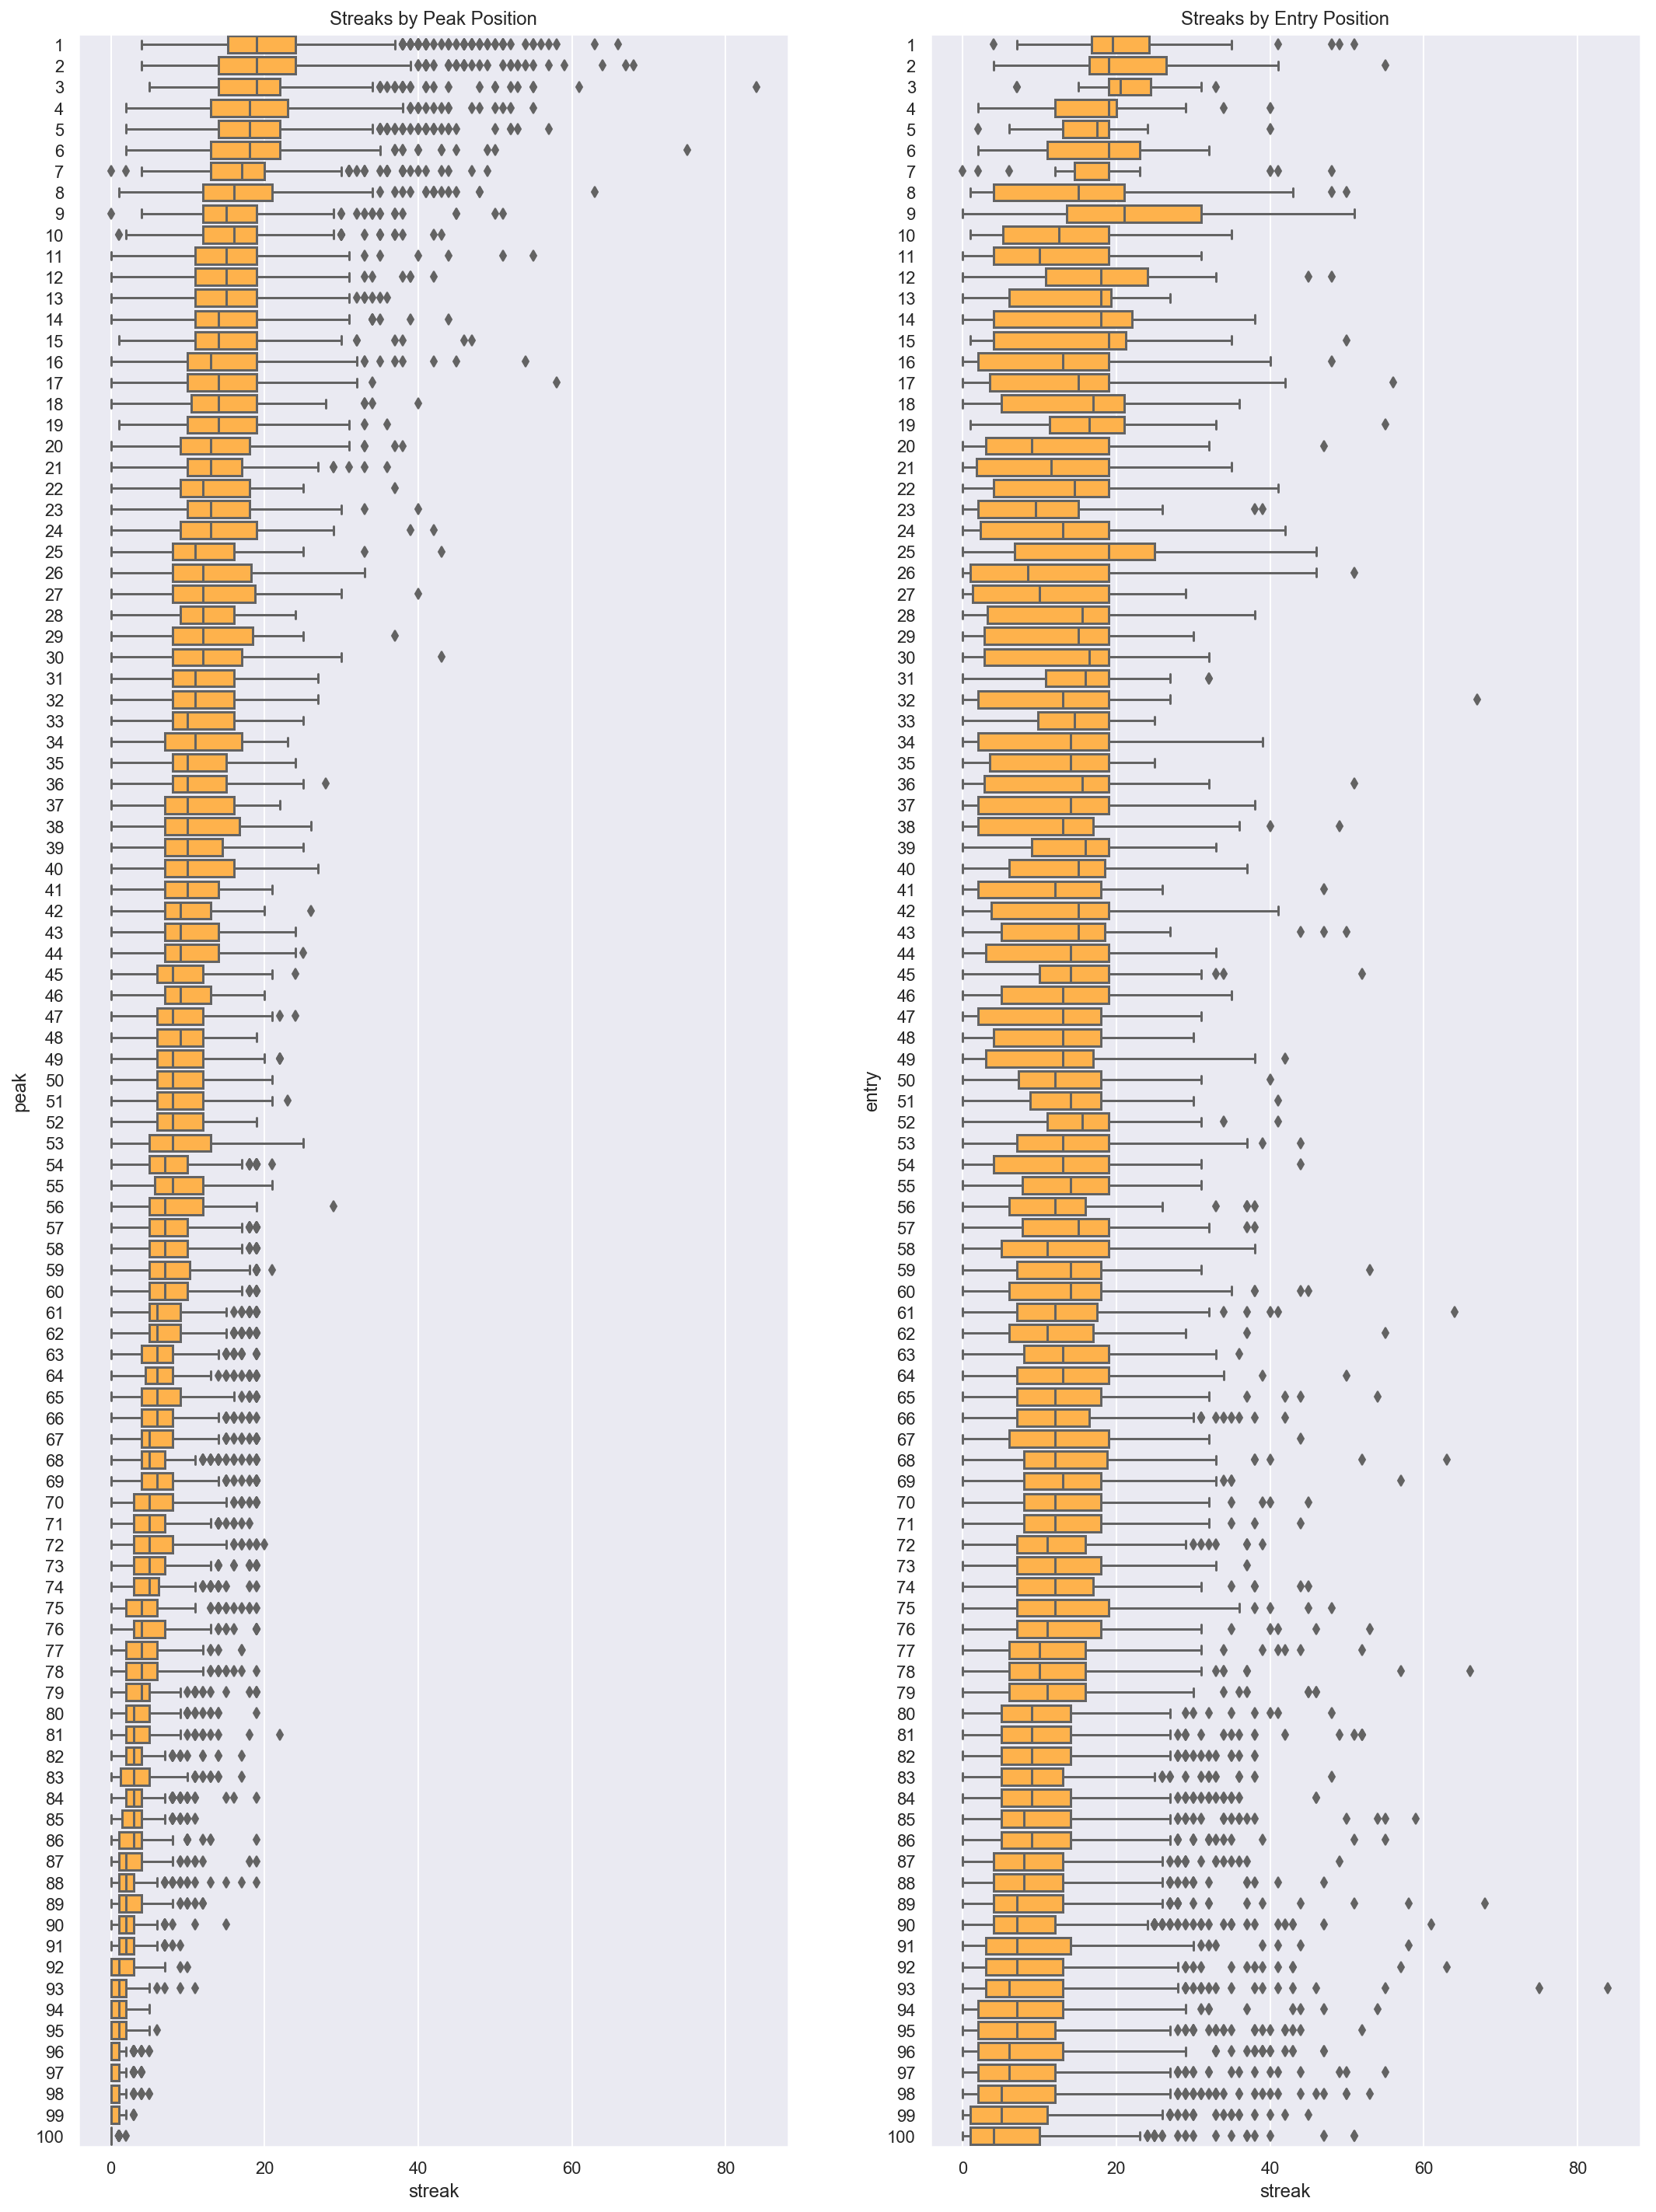

In [15]:
fig, ax = plt.subplots(1,2,figsize=(18,25))

_ = plt.subplot(1,2,1)
_ = sns.boxplot(y='peak',x='streak',data=hot100_uniq,saturation=1,color='#feb24c',orient='h')
_ = plt.title('Streaks by Peak Position')

_ = plt.subplot(1,2,2)
_ = sns.boxplot(y='entry',x='streak',data=hot100_uniq,saturation=1,color='#feb24c',orient='h')
_ = plt.title('Streaks by Entry Position')

Looking at the streak distribution by `peak` position, we can see that higher peak positions tend to correlate with longer streak lengths. 

Entry positions on the other tend to have only a loose relationship with streak lengths. If a track enters in the top 7, except for a few outliers, they tend to stay longer on the Hot 100 but for entry positions between 8-75, such a relationship doesn't seem obvious but for entry positions >75 we can see a gradual decline in streak length.

### A First Hypothesis for Weighing

In conclusion, the different streak lengths bring me to a first hypothesis. 

"Not all titles that make it onto the Hot 100 are created equal."

There are different categories (e.g. long-lasting, medium-range, short-stays), with different chances of success on the Hot 100 (success in this case would be defined as staying on the hot 100 a long time. This could allow us to create subcategories with higher probabilities of making it onto the Hot 100 and those that are just flukes/noise. 

### Pole Position Streaks

Staying on the Hot 100 is one thing but I'm curious what songs were able to stay on the Hot 100's pole position the longest.

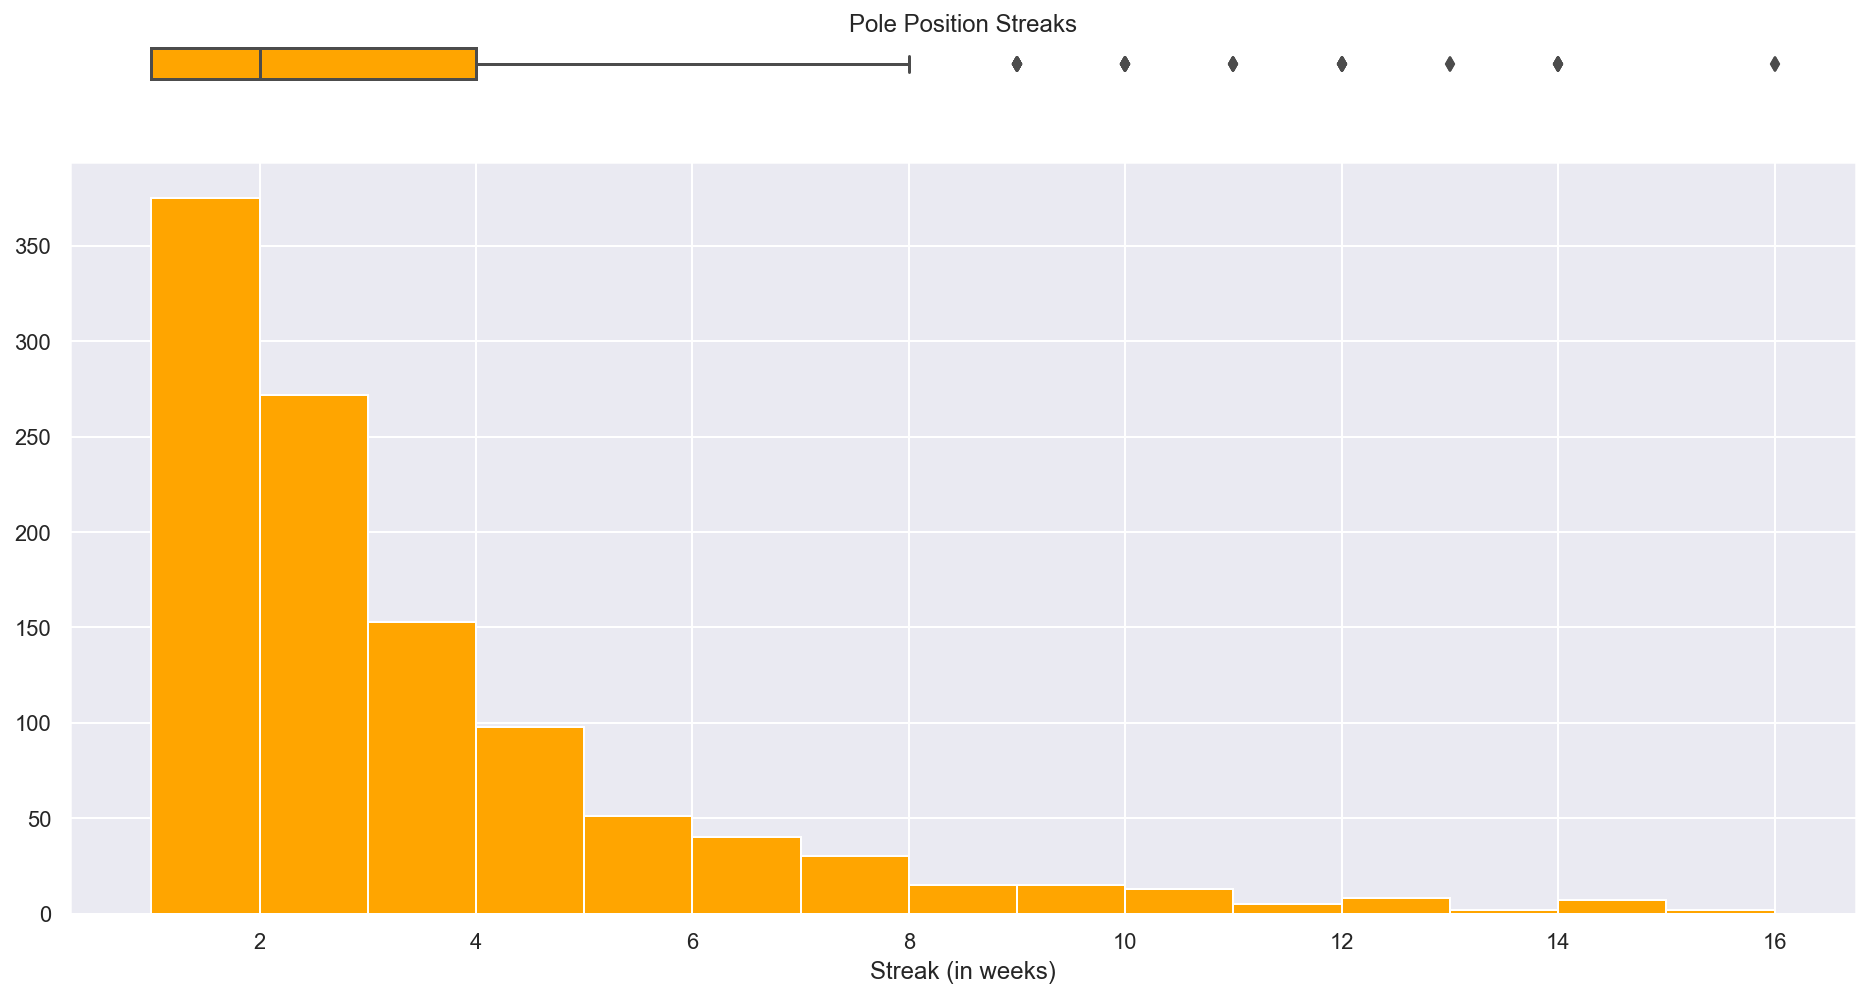

In [16]:
longest_nr_1 = hot100.loc[hot100['rank'] == 1,['artist','title','rank']].rename(columns={'rank':'weeks'}).groupby(by=['artist','title']).count()
ax_box, ax_hist = create_hist(longest_nr_1['weeks'],bins=15)
_ = ax_box.set_title('Pole Position Streaks')
_ = ax_hist.set_xlabel('Streak (in weeks)')

In [17]:
longest_nr_1.sort_values(by='weeks',ascending=False).head(2)

,,weeks
artist,title,
Luis Fonsi & Daddy Yankee Featuring Justin Bieber,Despacito,16
Mariah Carey & Boyz II Men,One Sweet Day,16


In [18]:
birthday_hit = pd.merge(hot100,longest_nr_1,on=['artist','title'],how='inner')
birthday_hit = birthday_hit.loc[birthday_hit['rank'] == 1,:]
sebastian = birthday_hit.loc[(birthday_hit['year'] == 1989) & (birthday_hit['month'] == 11) & (birthday_hit['day'] >= 1) & (birthday_hit['day'] < (1 + 7)),:]
brett = birthday_hit.loc[(birthday_hit['year'] == 1987) & (birthday_hit['month'] == 11) & (birthday_hit['day'] >= 26) & (birthday_hit['day'] < (26 + 7)),:]
becci = birthday_hit.loc[(birthday_hit['year'] == 1979) & (birthday_hit['month'] == 12) & (birthday_hit['day'] >= 26) & (birthday_hit['day'] < (26 + 7)),:]
maxi = birthday_hit.loc[(birthday_hit['year'] == 2009) & (birthday_hit['month'] == 10) & (birthday_hit['day'] >= 12) & (birthday_hit['day'] < (12 + 7)),:]
felix = birthday_hit.loc[(birthday_hit['year'] == 2013) & (birthday_hit['month'] == 3) & (birthday_hit['day'] >= 13) & (birthday_hit['day'] < (13 + 7)),:]
emil = birthday_hit.loc[(birthday_hit['year'] == 2014) & (birthday_hit['month'] == 12) & (birthday_hit['day'] >= 18) & (birthday_hit['day'] < (18 + 7)),:]
lilly = birthday_hit.loc[(birthday_hit['year'] == 2019) & (birthday_hit['month'] == 4) & (birthday_hit['day'] >= 9) & (birthday_hit['day'] < (9 + 7)),:]
brett

,rank,date,year,month,day,title,artist,week,reentry,streak,ranked,entry_date,entry_week,entry,entry_year,entry_month,entry_day,exit_date,exit_week,exit,exit_year,exit_month,exit_day,peak,peak_date,peak_week,peak_year,peak_month,peak_day,leap_week,leap,max_leap,max_leap_date,max_leap_week,max_leap_year,max_leap_month,max_leap_day,low,weeks
2235,1,1987-11-28,1987,11,28,(I've Had) The Time Of My Life,Bill Medley & Jennifer Warnes,10,0,20,21,1987-09-26,1,73,1987,9,26,1988-02-13,21,91,1988,2,13,1,1987-09-26,1,1987,9,26,10,1.0,19.0,1987-10-03,2.0,1987.0,10.0,3.0,91,1


We can see that less than 50% last more than 2 weeks on the Hot 100 pole position and only 2 songs were able to stay on the very top of the Hot 100 charts for 16 weeks.

# Who jumped the furthest? Leaps

Now that we've looked at streaks, I'm interested to know how the jumps from one position (i.e. a leap) to another are distributed.

In [19]:
GrayB = ['#41b6c4',"gray","black"]
sns.set_palette(GrayB)

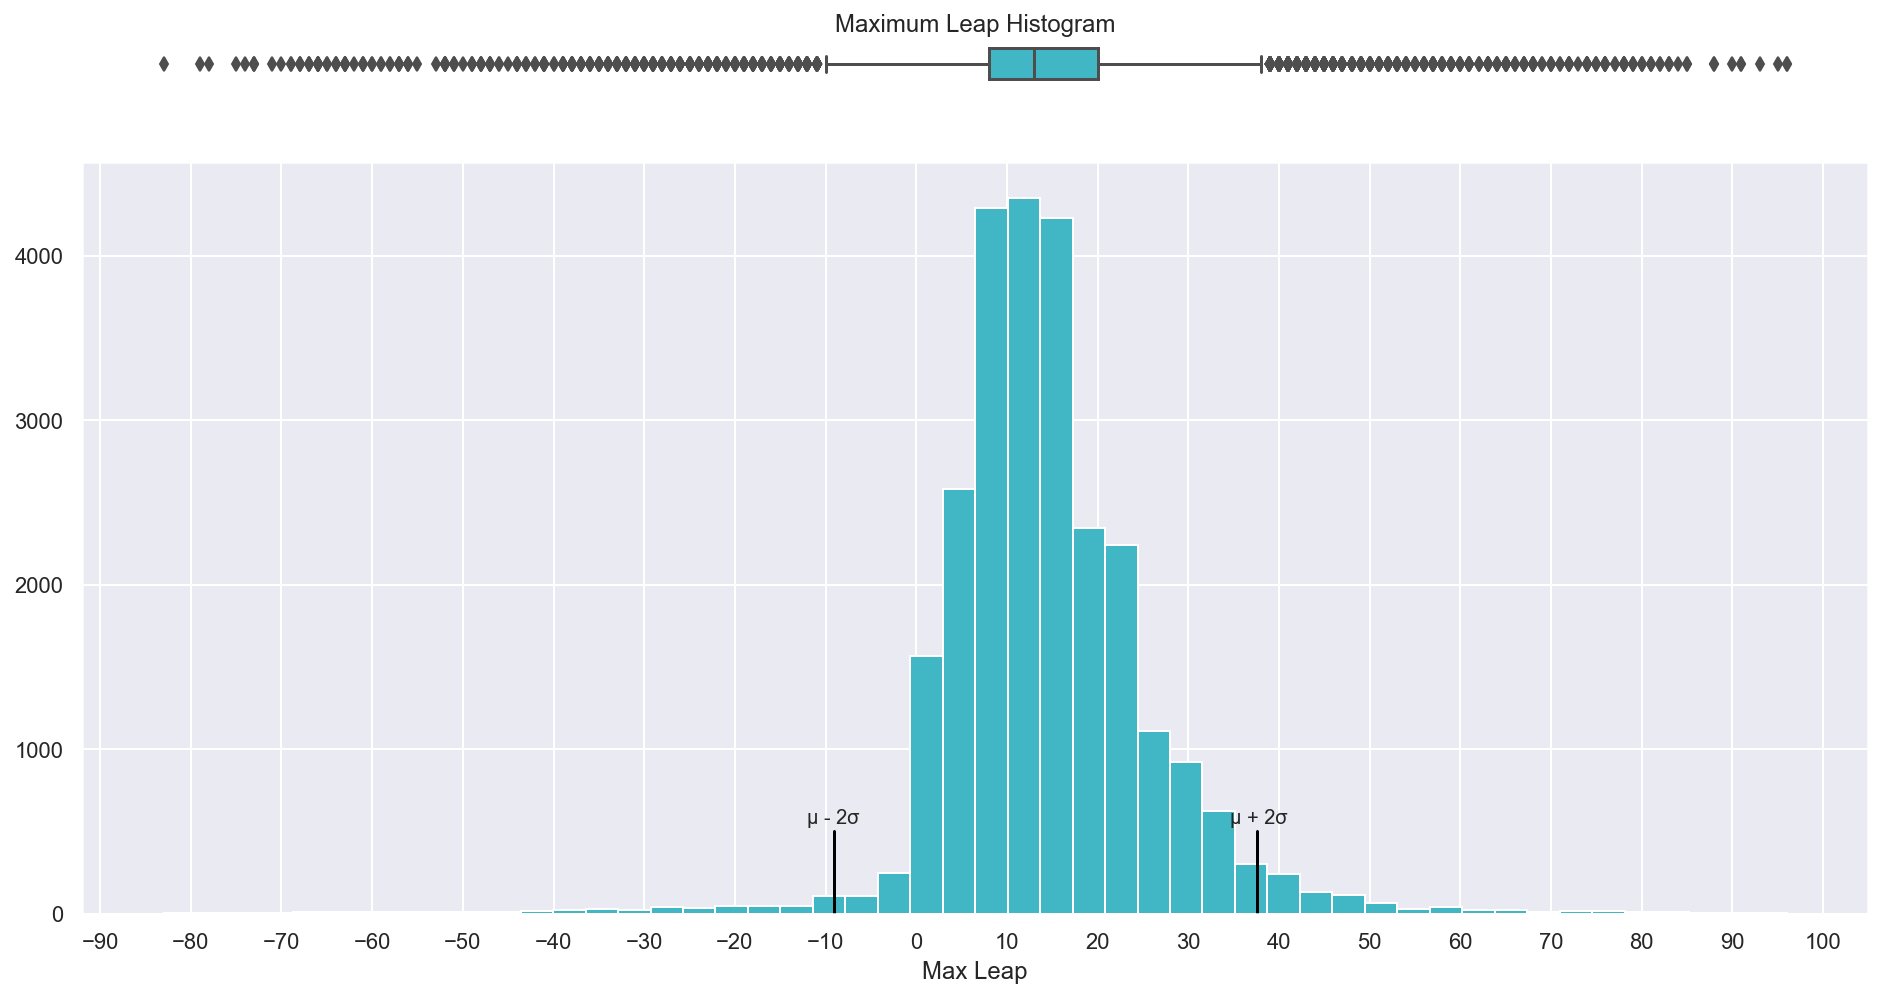

In [20]:
x = hot100_uniq['max_leap'].dropna()

ax_box, ax_hist = create_hist(x,std=True,xticks=(-100,100,10))

_ = ax_box.set_title('Maximum Leap Histogram')
_ = ax_hist.set_xlabel('Max Leap')

We see that the median leap was just above 10 positions and that we can generally expect for most titles to leap at most between 7-19 places. We also can see that leaps beyond the 38 are generally rare, so are negative maximum leaps beyond -9 (i.e. titles that consistently fell in position from their initial entry).

We can also see that generally a title moves up at some point during their time on the Hot 100.

### What titles made the biggest jumps?

In [21]:
biggest_leaps = hot100_uniq.loc[hot100_uniq.max_leap.isin(hot100_uniq.max_leap.nlargest(9)),main_cols_hot100_uniq].sort_values(by='max_leap',ascending=False)
biggest_leaps

,,entry_year,reentry,streak,ranked,entry,exit,peak,low,max_leap
artist,title,,,,,,,,,
Kelly Clarkson,My Life Would Suck Without You,2009,0,23,24,97,44,1,97,96.0
Dixie Chicks,Not Ready To Make Nice,2006,2,16,24,28,42,4,100,96.0
Britney Spears,Womanizer,2008,0,22,23,96,45,1,96,95.0
Lady Gaga,Million Reasons,2016,4,8,20,76,41,4,97,93.0
Beyonce & Shakira,Beautiful Liar,2007,0,17,18,94,91,3,94,91.0
LL Cool J Featuring Jennifer Lopez,Control Myself,2006,1,7,11,93,99,4,99,91.0
Maroon 5 Featuring Cardi B,Girls Like You,2018,0,44,45,94,23,1,94,90.0
Drake Featuring Nicki Minaj,Make Me Proud,2011,0,19,20,97,53,9,97,88.0
Akon Featuring Eminem,Smack That,2006,0,29,30,95,49,2,95,88.0


The biggest leaps from one week to another are with 96 very close to the limit of 99. Since all of these songs have jumped at least 88 places they have peak positions in the top 10, despite their lowest position having been in the bottom 6 positions.

Most songs entered the charts at the bottom but there is two songs that started out at a higher position, dropped to a very low position and then jumped back into one of the highest positions. Maybe we can understand this better if we look at their leaps as a timeline.

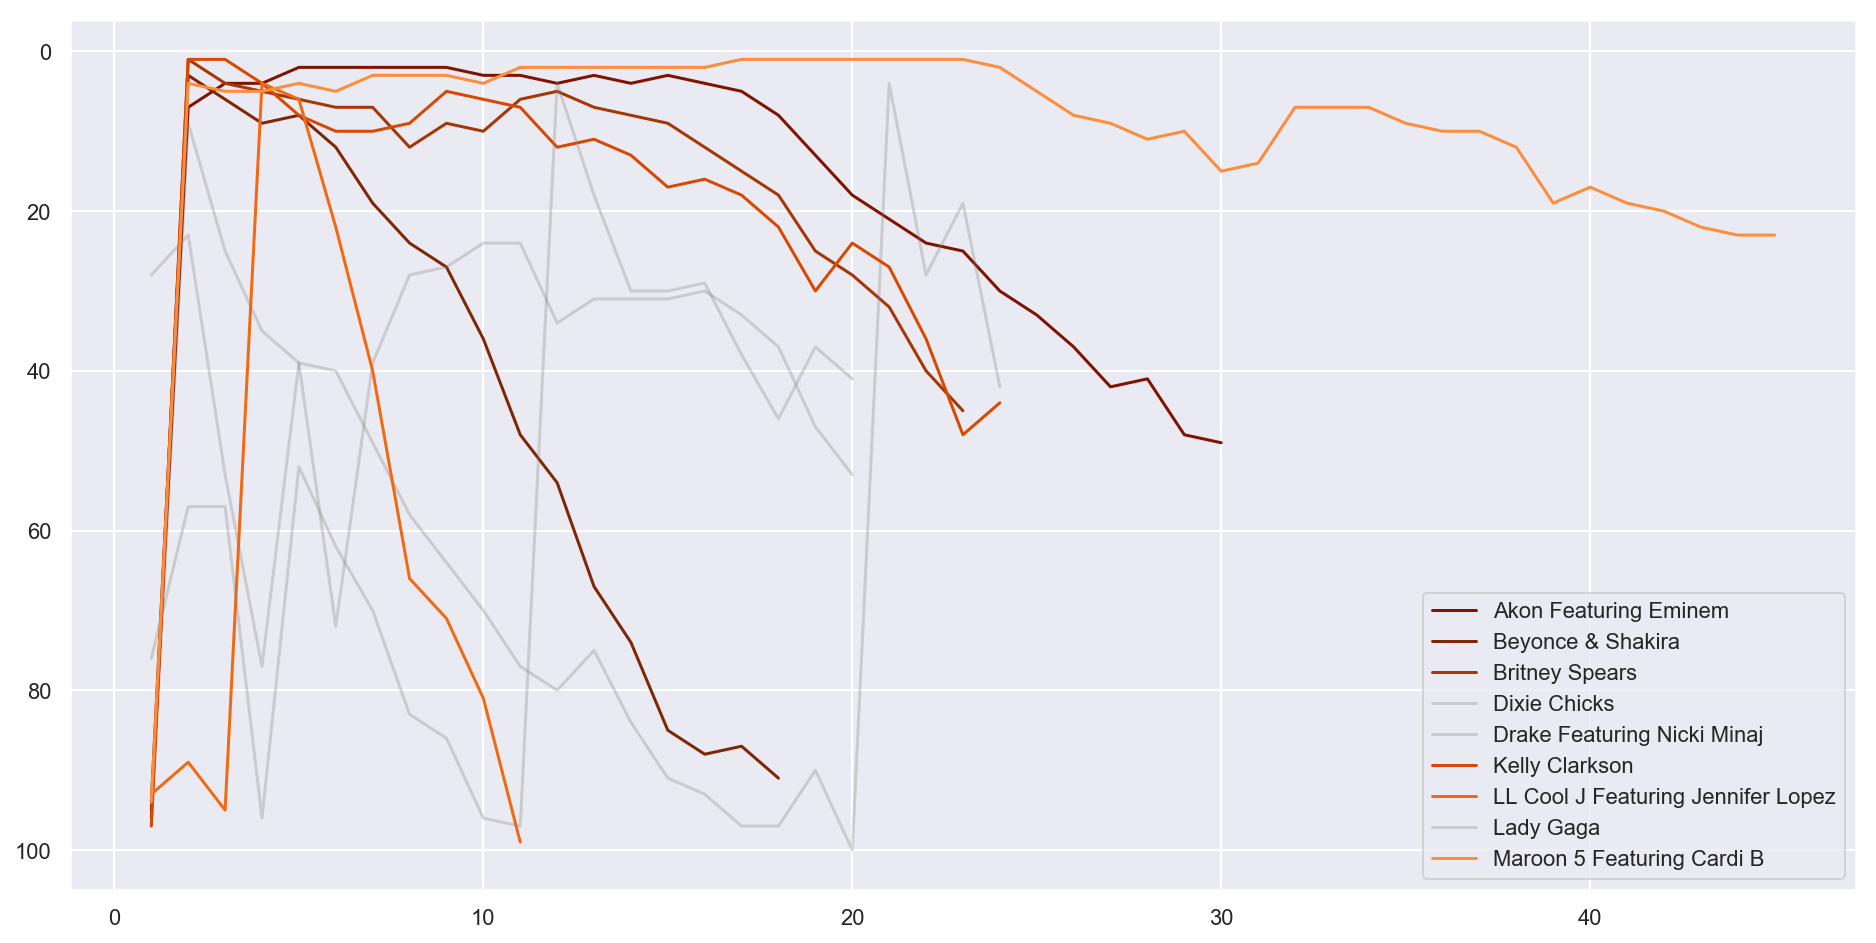

In [22]:
week_rank = pd.merge(hot100.set_index(['artist','title']),biggest_leaps,on=['artist','title'],how='inner').loc[:,['week','rank']]
week_rank_sorted = week_rank.sort_values(by=['artist','title','week'])
colors_iter = iter(colorsO)
fig = plt.figure(figsize=(16,8))
for i, row_index in enumerate(week_rank_sorted.index.unique()):
    artist, title = row_index
    if artist in ['Dixie Chicks','Lady Gaga','Drake Featuring Nicki Minaj']:
        color = 'gray'
        alpha = 0.3
    else:
        color = next(colors_iter)
        alpha = 1
    plt.plot(week_rank_sorted.loc[(artist,title),'week'],week_rank_sorted.loc[(artist,title),'rank'],label=artist,c=color,alpha=alpha)
_ = plt.gca().invert_yaxis()
_ = plt.legend()

There is 3 songs that are disturbing a common pattern we might be able to identify here. 7 songs rise show their max leap to a high position within the first 3 weeks of its first appearance on the Hot 100. After the initial high is reached there tends to be more or less a steady decline in position (i.e. a significant recovery after peaking seems rare). Let's explore this thought further by looking at the time to max leap and average distance to peak position.

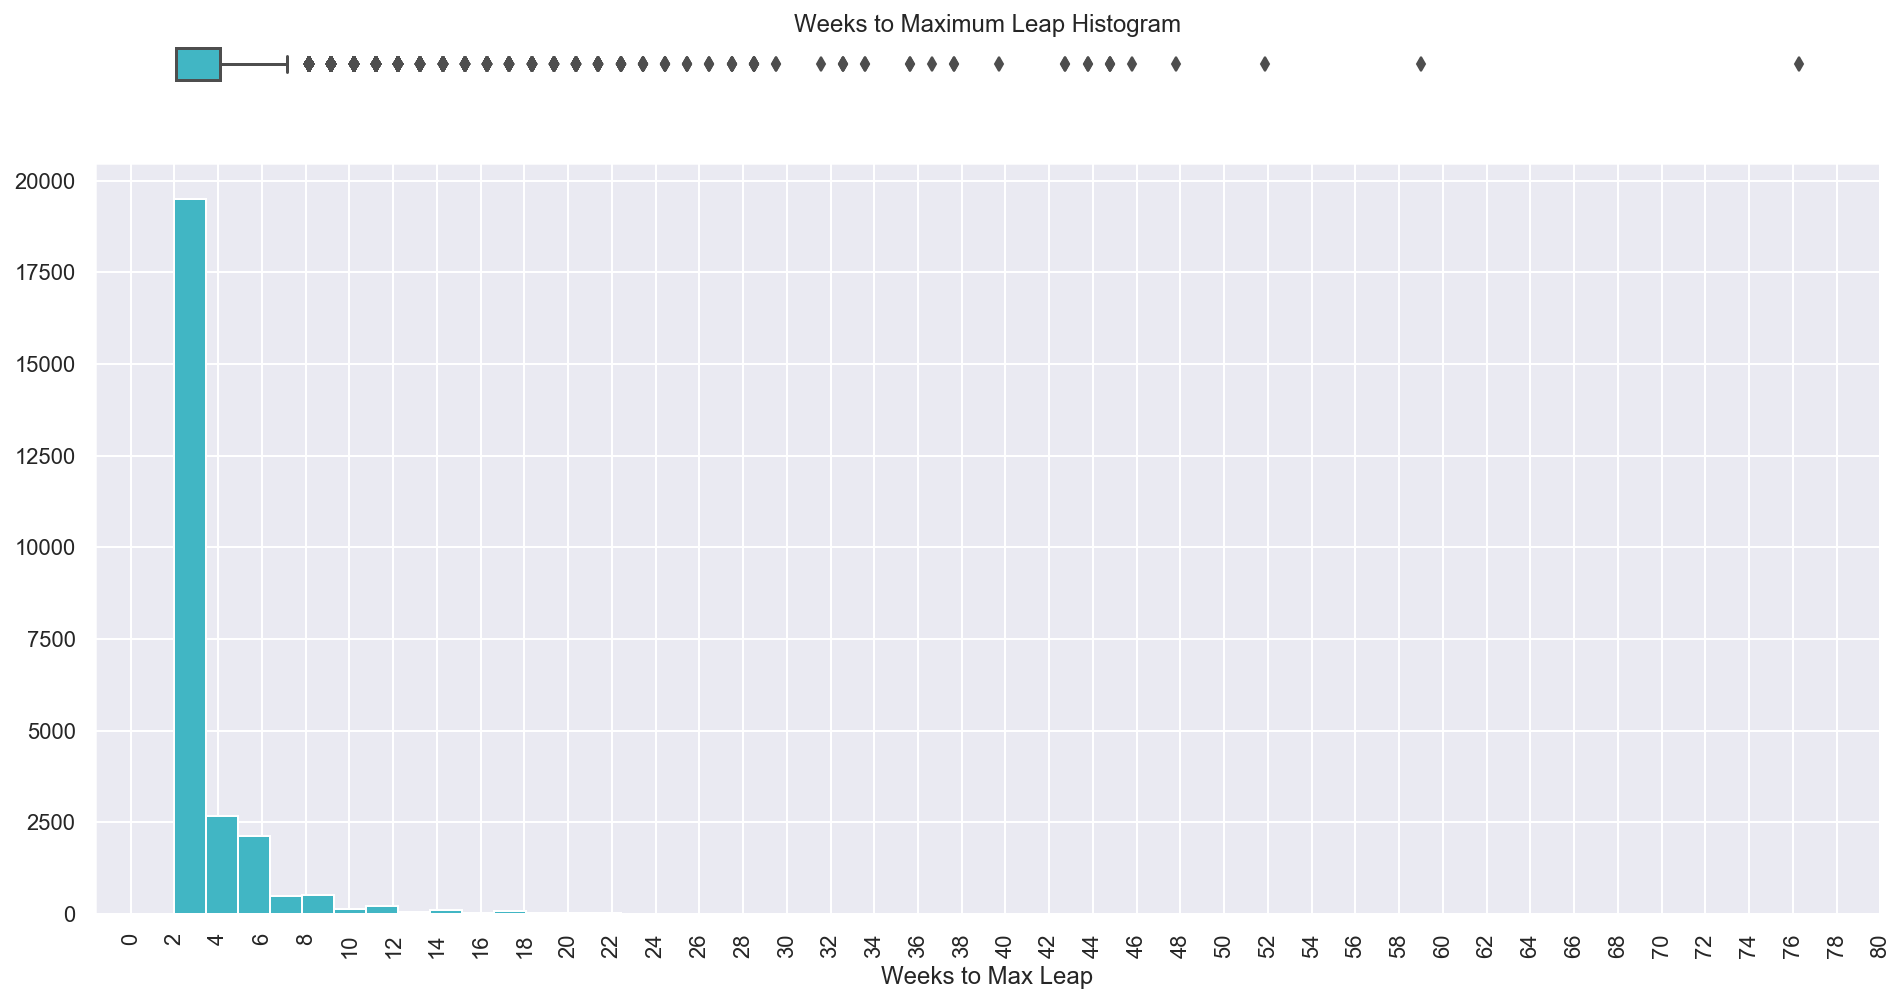

In [23]:
x = hot100_uniq['max_leap_week'].dropna()


ax_box, ax_hist = create_hist(x,xticks=(0,80,2))
_ = ax_box.set_title('Weeks to Maximum Leap Histogram')
_ = ax_hist.set_xlabel('Weeks to Max Leap')
_ = plt.xticks(rotation=90)

We can see that the highest jumps occur most often in the second or third week of songs making their debut on the Hot 100.

Number of titles that reached their peak position in the weak of their maximum leap: 4375 (i.e. 15.58%)

count    26105.000000
mean        19.684467
std         17.879856
min          0.000000
25%          3.000000
50%         16.000000
75%         32.000000
max         96.000000
Name: dist_peak, dtype: float64


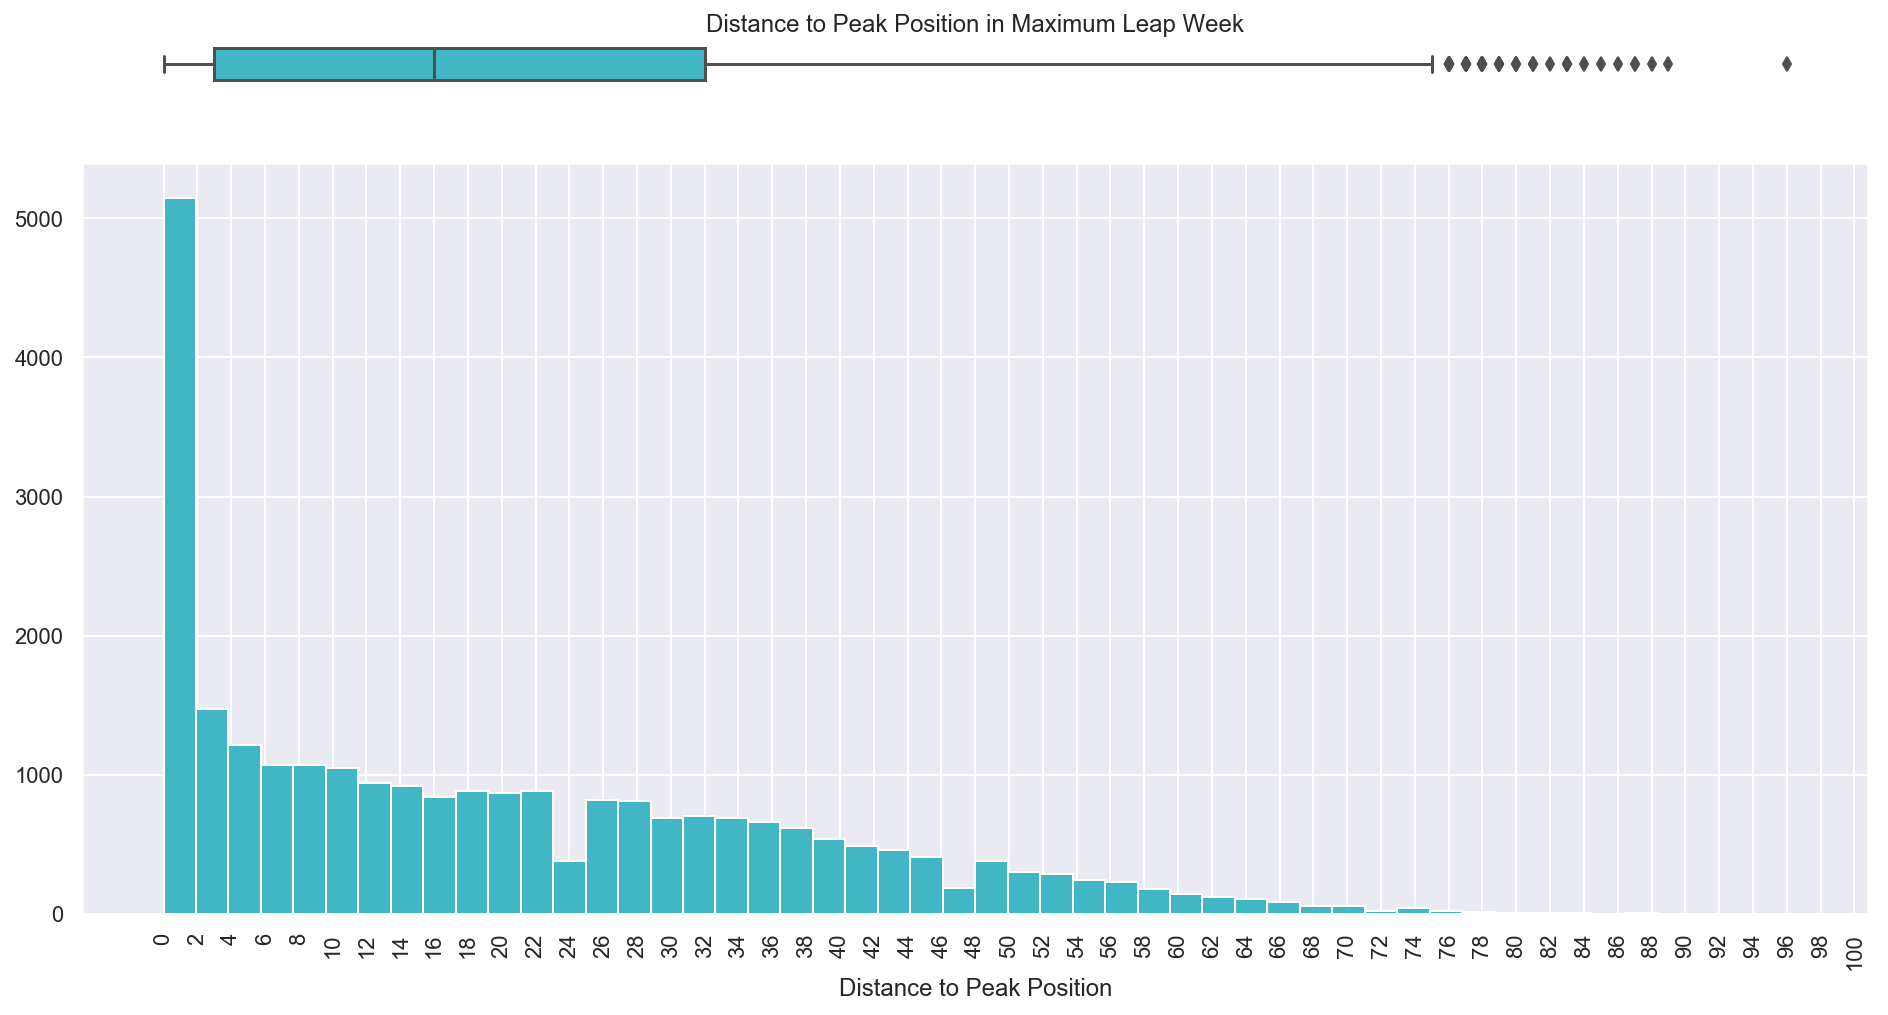

In [24]:
# Peak position minus position after maximum leap
hot100_week_rank = hot100.loc[:,['artist','title','week','rank']]
hot100_uniq_leap = pd.merge(hot100_uniq,hot100_week_rank,left_on=['artist','title','max_leap_week'],right_on=['artist','title','week'],how='left')
hot100_uniq_leap.rename(columns={'week_x':'week','rank':'max_leap_rank'},inplace=True)
hot100_uniq_leap.drop('week_y',axis=1,inplace=True)
hot100_uniq_leap['dist_peak'] = hot100_uniq_leap['max_leap_rank'] - hot100_uniq_leap['peak']

x = hot100_uniq_leap.loc[:,'dist_peak'].dropna()

ax_box, ax_hist = create_hist(x,xticks=(0,100,2))
ax_box.set_title('Distance to Peak Position in Maximum Leap Week')
ax_hist.set_xlabel('Distance to Peak Position')
_ = plt.xticks(rotation=90)

max_leap_peaked = hot100_uniq_leap.loc[hot100_uniq_leap['dist_peak'] == 0,'dist_peak'].count()
print("Number of titles that reached their peak position in the weak of their maximum leap: {} (i.e. {}%)".format(max_leap_peaked,round(max_leap_peaked/len(hot100_uniq_leap)*100,2)))
print()
print(x.describe())

Again we're looking at a strongly left-skewed histogram. 50% land within 16 positions to their peak position 25% within only 3 positions and close to 1/6th immediately reaches their peak position in the week of their maximum leap.

Nevertheless, we can also see that their is considerable variability in this observation. Let's now look closer at the fast quick risers that land within 3 positions (i.e. the top 25%) of their peak position.

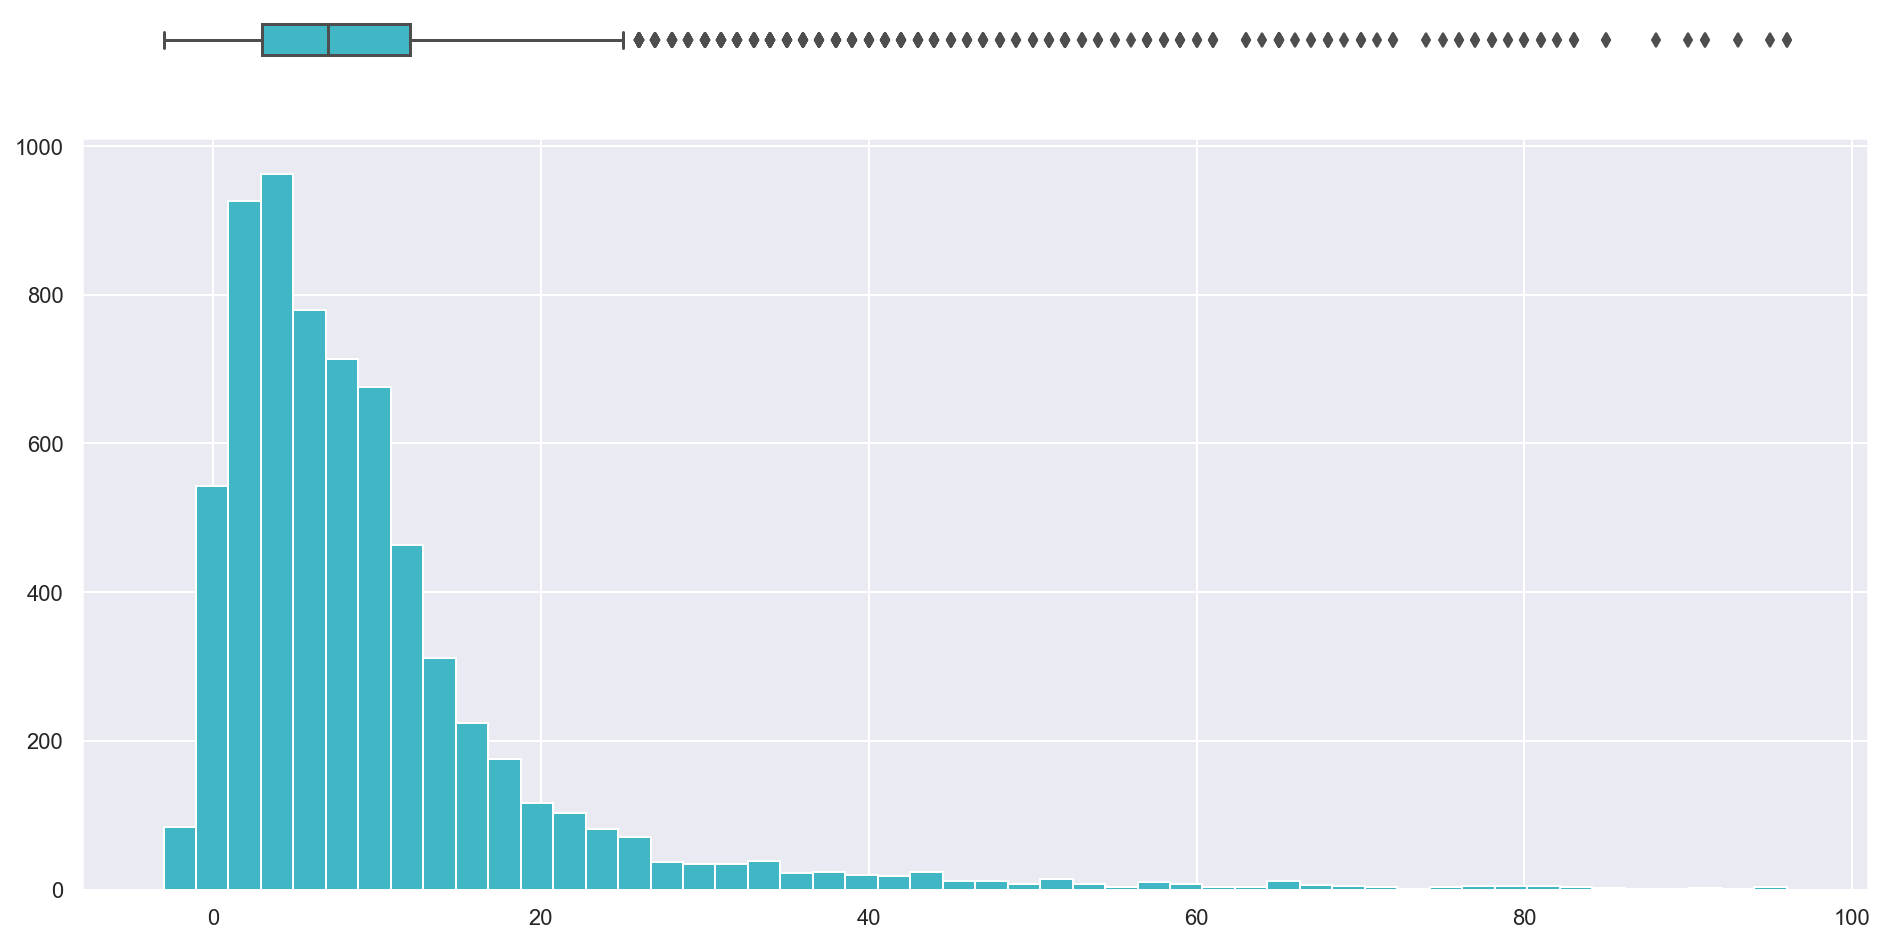

In [25]:
cond_1q = hot100_uniq_leap['dist_peak'] <= hot100_uniq_leap['dist_peak'].quantile(q=.25)
hot100_leap_1q = hot100_uniq_leap.loc[cond_1q,:]
ax_box, ax_hist = create_hist(hot100_leap_1q.max_leap)

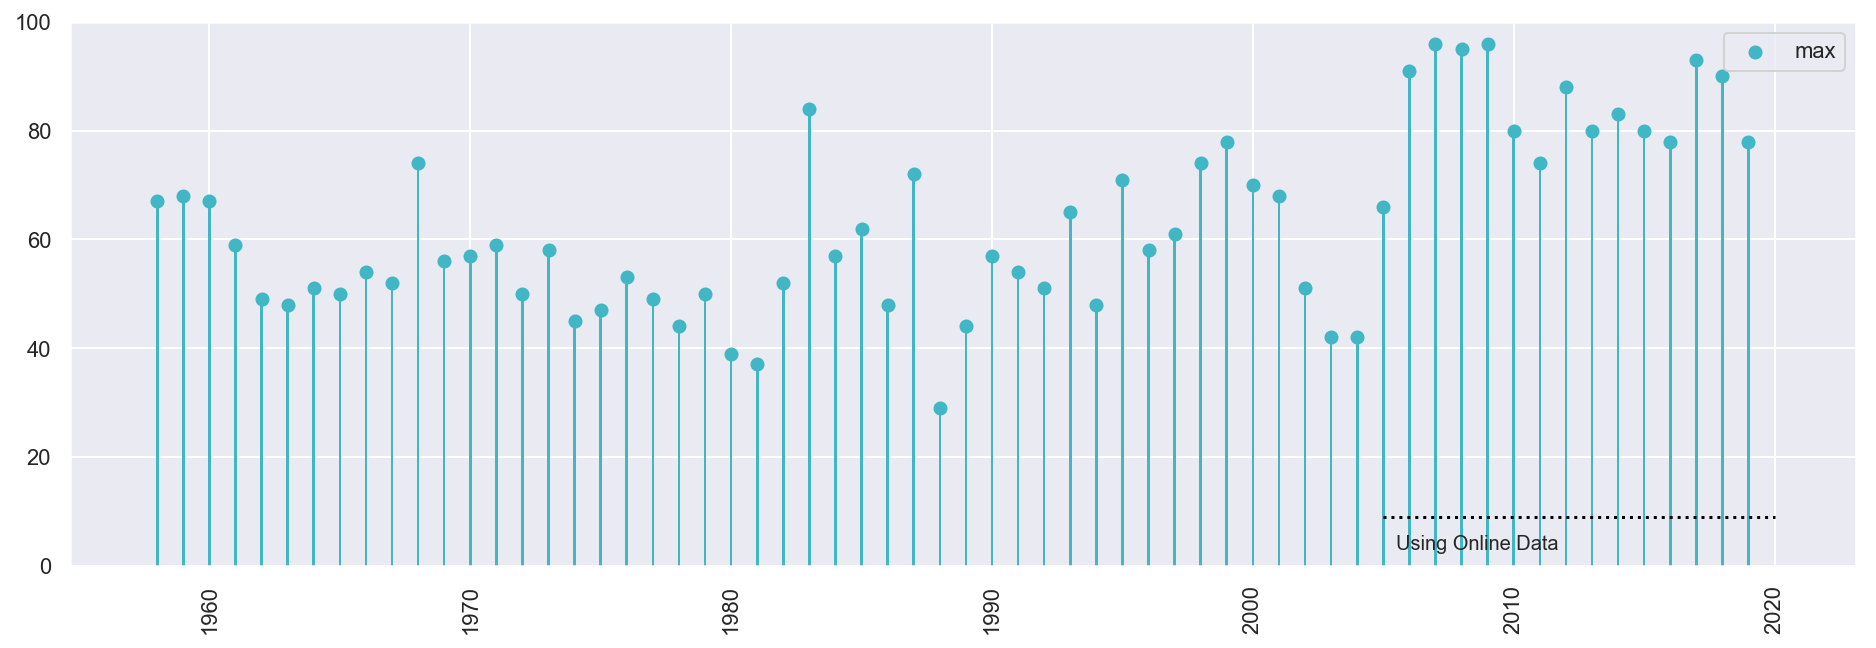

In [26]:
_ = plt.figure(figsize=(16,5))

hot100_year_max = hot100_uniq.groupby(by=['year'])['max_leap'].max()
_ = plt.bar(hot100_year_max.index,hot100_year_max,width=0.1,linewidth=0)
_ = plt.scatter(hot100_year_max.index,hot100_year_max,label='max',c='#41b6c4')
_ = plt.plot([2005,2020],[9,9],c='black',linestyle='dotted')
_ = plt.annotate(s='Using Online Data',xy=[2005,3],xytext=[2005.5,3])
_ = plt.ylim(0,100)
_ = plt.legend()
_ = plt.xticks(rotation=90)
print()

### Movements

In [27]:
hot100_move = hot100_uniq.copy()
for i in range(1,100,10):
    hot100_move.loc[(hot100_move['peak'] >= i) & (hot100_move['peak'] <= i+9), 'top'] = str(i) + '-' + str(i+9)

def plot_stacked_bar(df,x_name='entry',category_name='top'):
    variables = pd.DataFrame(columns=sorted(df[x_name].unique()))
    variable_cols = variables.columns
    categories = sorted(df[category_name].unique(),reverse=False)

    for i, category in enumerate(categories):
        var_ls = []
        for var in variable_cols:
            y = df.loc[(df[category_name] == category) & (df[x_name] == var),x_name].count()
            var_ls.append(y)
        bottom = variables.sum()
        var_s = pd.Series(var_ls,index=variable_cols,name=i)
        var_s.name = i
        variables = variables.append(var_s)
        if i == 0:
            plt.bar(variable_cols,variables.loc[i,:].T,color=colorsO[i],label=category)
        else:
            plt.bar(variable_cols,variables.loc[i,:].T,bottom=bottom,color=colorsO[i],label=category)
    _ = plt.legend()

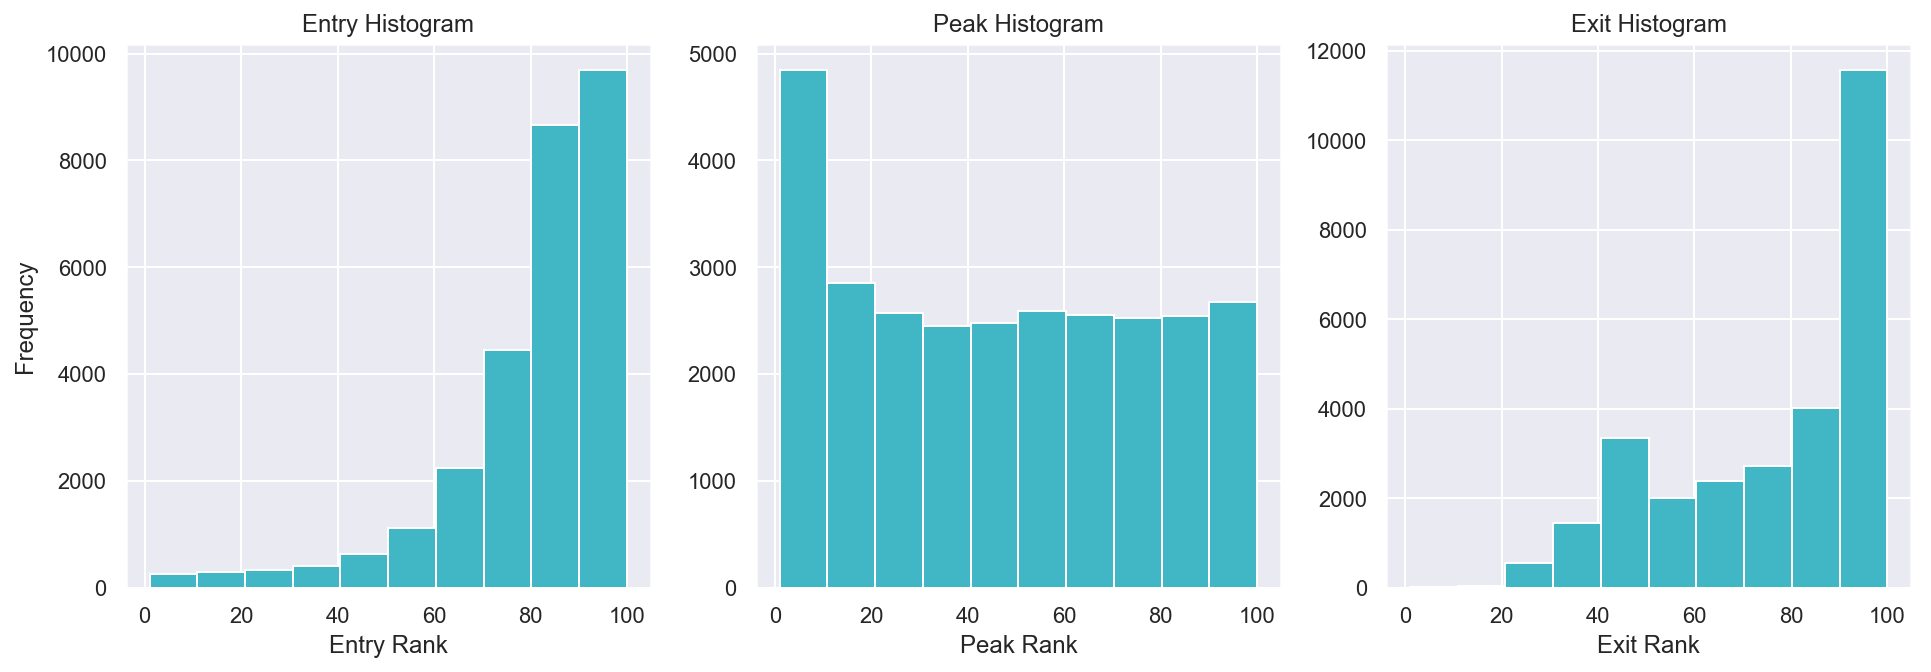

In [28]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

_ = plt.subplot(1,3,1)
_ = plt.hist(hot100_uniq['entry'])
_ = plt.xlabel('Entry Rank')
_ = plt.ylabel('Frequency')
_ = plt.title('Entry Histogram')

_ = plt.subplot(1,3,2)
_ = plt.hist(hot100_uniq['peak'])
_ = plt.xlabel('Peak Rank')
_ = plt.title('Peak Histogram')

_ = plt.subplot(1,3,3)
_ = plt.hist(hot100_uniq['exit'])
_ = plt.xlabel('Exit Rank')
_ = plt.title('Exit Histogram')

Entry positions are highly skewed to the left. 

### Commonalities between top performers

In [29]:
intersected_df = pd.merge(longest_streaks, biggest_leaps, how='inner')
intersected_df

,streak,peak,entry,exit,entry_year,reentry,ranked,low,max_leap


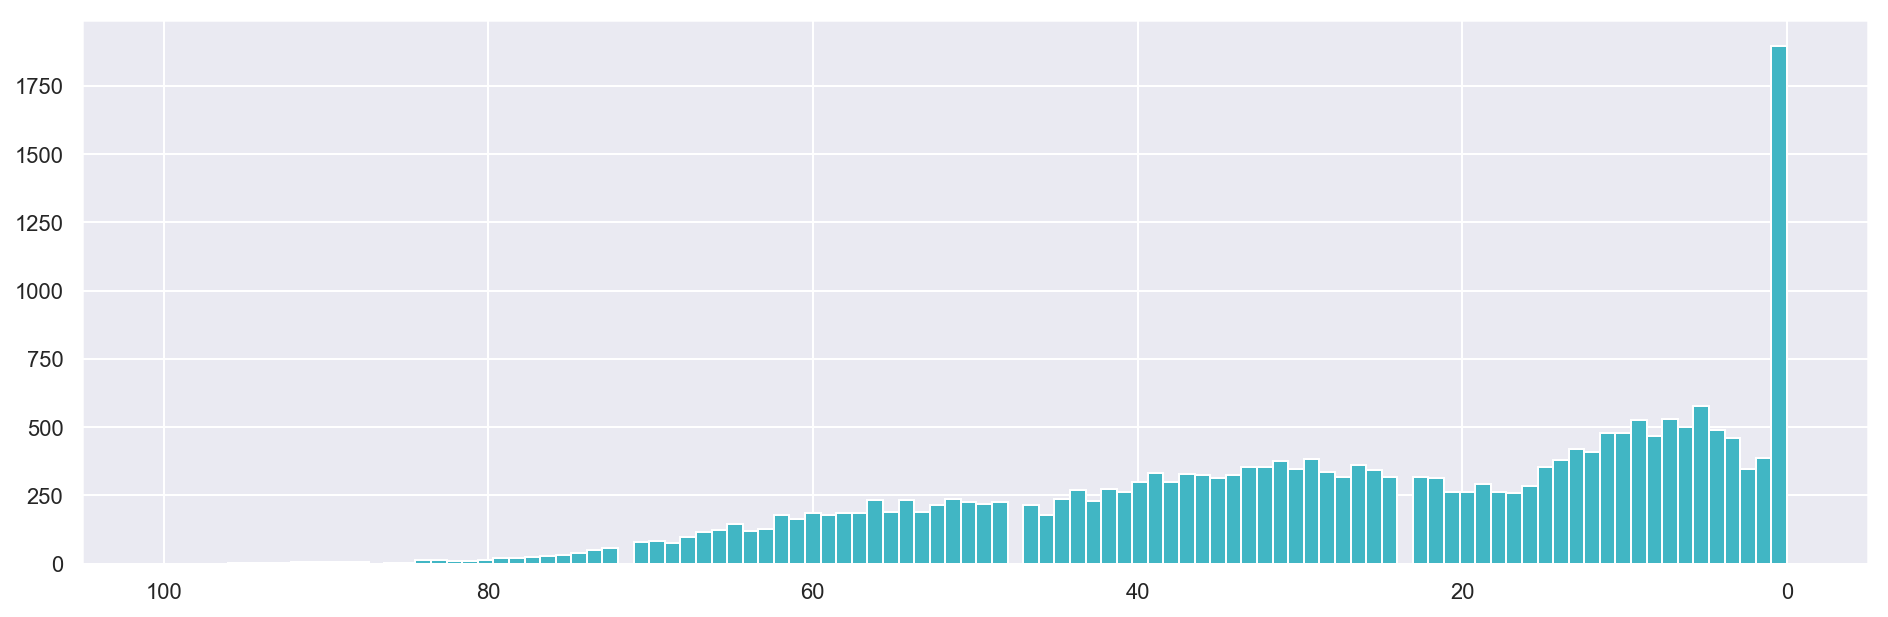

In [30]:
_ = plt.figure(figsize=(16,5))
_ = plt.hist(nhits['popularity'],bins=100)
_ = plt.xlim(105, -5)

In [31]:
rank = hot100.loc[:,['artist','title','rank','entry','date']]
rank['title_artist'] = rank['title'] + '------' + rank['artist']
rank.drop(['title','artist'],axis=1,inplace=True)

def get_week(col):
    return pd.Series(np.arange(1,len(col) + 1))

rank_sorted = rank.sort_values(by=['title_artist','date'])
rank_sorted['week'] = rank_sorted.groupby(by=['title_artist']).date.transform(get_week)
rank_sorted = rank_sorted.set_index(['week','entry'])
rank_sorted['rank_mean'] = rank_sorted.groupby(by=['week','entry'])['rank'].mean()
rank_sorted.drop(['title_artist','date','rank'],axis=1,inplace=True)
rank_sorted.columns = ['value']
rank_sorted.reset_index(inplace=True)

In [32]:
rank_sorted.head()

,week,entry,value
0,1,84,84.000000
1,2,84,72.417105
2,3,84,62.917344
3,4,84,55.562147
4,5,84,49.724444


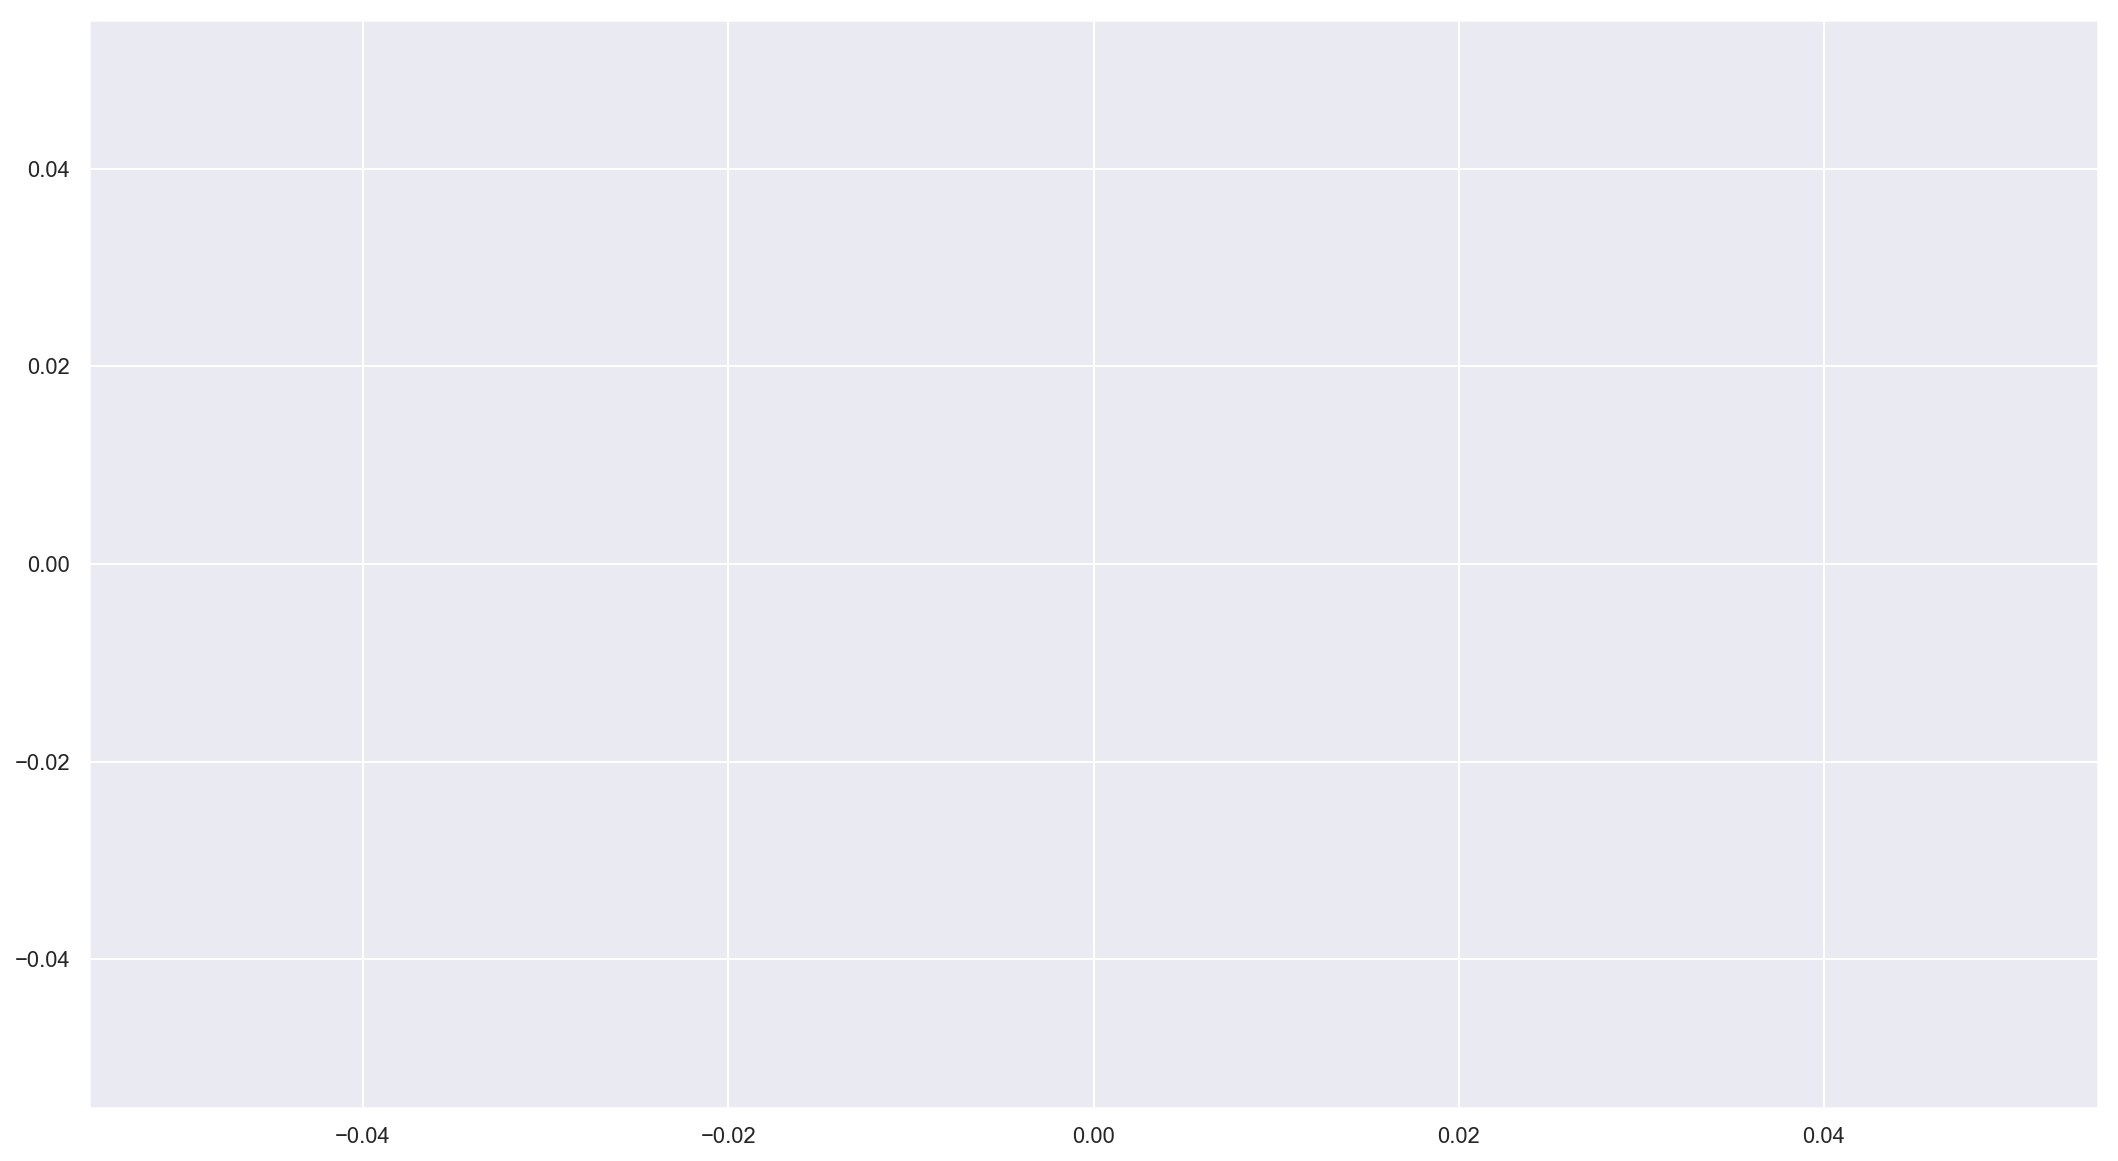

In [33]:
fig = plt.figure(figsize=(18,10))
for entry in range(100,1,-1):
    weeks = np.arange(rank_sorted.loc[rank_sorted['entry'] == entry, 'week'].max())
    line_df = pd.Series(np.full(len(weeks),np.nan),index=weeks)
    for week in weeks:
        try:
            line_df[week] = rank_sorted.loc[(rank_sorted['week'] == week) & (rank_sorted['entry'] == entry),'value'].first()
        except:
            line_df[week] = np.nan
    _ = plt.plot(line_df.index,line_df,label=entry)

In [34]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id='e3cddf5da81f43c3a33814866a8de8ed', client_secret='f885f6255fb34c90b8679817d9c63c25')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username = '1162788143'
scope = 'user-library-read playlist-modify-public'
token = util.prompt_for_user_token(username,scope,client_id='e3cddf5da81f43c3a33814866a8de8ed',client_secret='f885f6255fb34c90b8679817d9c63c25',redirect_uri='http://localhost:3000/spotify')

print(token)
sp = spotipy.Spotify(auth=token)
playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    if playlist['owner']['id'] == username:
        print( playlist['name'],playlist['id'])
        
# add tracks
playlist = '0iP1Sz5qSCmVomZUNYbKPj'

tracks = over_30_bf_1990.merge(hits,on=['artist','title'],how='left')['id'].dropna()

count = 0
tracks_chunks = []
chunk_size = 50
for i in range(0, len(tracks), chunk_size):
    count += 1
    tracks_chunks.append(tracks[i:i + chunk_size].tolist())

for track_chunk in tracks_chunks:
    # results = sp.user_playlist_remove_all_occurrences_of_tracks(username, playlist, track_chunk)
    results = sp.user_playlist_add_tracks(username, playlist, track_chunk)
    pass

unidentified_tracks = over_30_bf_1990.merge(hits,on=['artist','title'],how='left')
unidentified_tracks = unidentified_tracks.loc[unidentified_tracks['id'].isnull(),:]
print('Unidentified Tracks: {}'.format(len(unidentified_tracks)))
unidentified_tracks.head()

BQATSxrHrK0kPXn6JLRFJIXZ0CXyLoDZ3pR7BOSlgiuxLOSbbC8TOPnfanuuTdfOvOJOERvFDKaHHNgV6hC-I7H2mNPYoDKKrPW0_LOqDGiDA805XUKicArcj5Y89T0GNYnkT-w7pLyYKxIAexJhYvJXx_CQrTx1vR41xSlT78FYhdr4uNRNkbzBZ0ZTPMAwcaiUJh6PC_8HyXK6nL4xged110KZ38WmG3iLnpQXm_qD79Fxee8fhAMZmeG4wt9bEhQi
Top Performers (over 30 weeks on Hot 100) after 1990 4hzjzSssha8VLHqwbyJiWA
Top Performers (over 30 weeks on Hot 100) before 1990 0iP1Sz5qSCmVomZUNYbKPj
One Last Time 3ZwAJ2qk43yd1koijPH7YT
Mama 2ePqWjZcg9KRfUnQDFhHbk
Sound|lak 6dyhSsiZpuMkewsyHVx6gm
r/electronicmusic 4JrcG01JVrPx5LwDZtCUmp
r/electronicmusic 07mrhm2rUzIIpxeHKBR7t6
r/electronicmusic 33TWFRDDJYZAXwOsOooGS1
r/listentothis 7cma3lRZ3lU5eib2XJOOfr
r/listentothis 26YyDqzb9tuexrTSdA7KBG
r/listentothis 48pm9w4KkgJpaEVXHuzN1I
r/listentothis 5j2H6xjeHPWl3iTOipTS46
r/listentothis 102IiL0kVjhztveDvy6v0T
r/listentothis 0u02nV7bU0Zj4HPpGoN6DG
r/electronicmusic 2V2fHJ88t33L68dnBW0TeQ
r/electronicmusic 6Cs8OjxrBDIu3pPdaw7Axm
r/listentothis 7H2sVYBbkyOlqDkrmdxUxh
r/listentothis 4o

NameError: name 'over_30_bf_1990' is not defined

In [ ]:
target_path = '../data/iterators/spotify_ids_hot100.csv'
target_df = pd.read_csv(target_path,sep='\t').drop_duplicates(subset=['artist','title'])

found = target_df.loc[~target_df['iterator'].isnull(),:]
not_found = target_df.loc[target_df['iterator'].isnull(),:]
print("Total: {}\nFound: {}\nNot Found: {}\nRatio: {}".format(len(target_df),len(found),len(not_found),len(not_found)/len(target_df)))

In [ ]:
nhits.columns

In [ ]:
hot100_move = hot100_uniq.copy()
for i in range(1,100,10):
    hot100_move.loc[(hot100_move['peak'] >= i) & (hot100_move['peak'] < i+10), 'top'] = str(i) + '-' + str(i+10)
by_top = hot100_move.loc[:,['top','entry','peak','exit']].groupby(by=['top'])
hot100_top_1q = by_top.quantile(q=0.25)
hot100_top_1q.columns = ['entry','peak','exit']
hot100_top_1q['top'] = hot100_top_1q.index
hot100_top_1q_melt = hot100_top_1q.melt(id_vars='top')

hot100_top_3q = by_top.quantile(q=0.75)
hot100_top_3q.columns = ['entry','peak','exit']
hot100_top_3q_melt = hot100_top_3q.melt()

hot100_top_mean = by_top.mean()
hot100_top_mean.columns = ['entry','peak','exit']
hot100_top_mean_melt = hot100_top_mean.melt()

hot100_top_plt = pd.concat([hot100_top_1q_melt,hot100_top_3q_melt,hot100_top_mean_melt],axis=1)
hot100_top_plt.columns = ['top','1q_move','1q_rank','3q_move','3q_rank','mean_move','mean_rank']

fig = plt.figure(figsize=(18,10))
colors = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704','#7f1300'][::-1]
for i,top in enumerate(sorted(hot100_top_plt.top.unique(),reverse=True)):
    moves = hot100_top_plt.loc[hot100_top_plt['top'] == top,:]
    _ = plt.fill_between(moves['1q_move'],moves['1q_rank'],y2=moves['3q_rank'], facecolor=colors[i],alpha=0.3)
    _ = plt.plot(moves['mean_move'],moves['mean_rank'],c=colors[i])
_ = plt.gca().invert_yaxis()
_ = plt.title('Streaks by Peak Position')

In [ ]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms','id']
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']
all_songs = pd.concat([hits.loc[:,columns], nhits.loc[:,columns]]).reset_index()
all_songs.loc[all_songs['id'].isin(hits['id']),'label'] = 1
all_songs.loc[all_songs['id'].isin(nhits['id']),'label'] = 0
x_cols = all_songs.loc[:,features].fillna(0)
indices = np.random.choice(all_songs.index,10000,replace=False)
x_cols = x_cols.loc[indices,:]
pca = PCA(n_components=12)

pca.fit(x_cols)
transformed = pca.transform(x_cols).T
try:
    transformed_clusters = pd.DataFrame({'x': transformed[0],'y': transformed[1],'z': transformed[2],'label':all_songs.loc[indices,'label']})
except:
    print('two-dimensional space')
    transformed_clusters = pd.DataFrame({'x': transformed[0],'y': transformed[1],'label':all_songs.loc[indices,'label']})    
    
fig = plt.figure(figsize=(18,10))

print(transformed_clusters)
def plot_pca(transformed_clusters,three_d=False):
    lgd_labels = sorted(transformed_clusters['label'].unique())
    
    if three_d:
        ax = fig.add_subplot(111, projection='3d')

        for label in lgd_labels:
            x = transformed_clusters.loc[transformed_clusters['label'] == label,'x']
            y = transformed_clusters.loc[transformed_clusters['label'] == label,'y']
            z = transformed_clusters.loc[transformed_clusters['label'] == label,'z']

            ax.scatter3D(x, y, z, label=label,alpha=0.3);
    else:
        for label in lgd_labels:
            x = transformed_clusters.loc[transformed_clusters['label'] == label,'x']
            y = transformed_clusters.loc[transformed_clusters['label'] == label,'y']

            _ = plt.scatter(x,y,label=label,marker='.')

    _ = plt.legend(loc="upper right", title="Cluster",fontsize=15)
    _ = plt.title('PCA Reduced Dimensions (incl. Clusters)')

plot_pca(transformed_clusters)